# Surprise Housing - Regression Assignment

The solution is divided into the following steps:

- Data understanding and exploration
- Data Exploration
- Transforming and Handling missing values
- Data Cleaning
- Model Building and Evaluation
- Compare the two regression models
- Inferences

In [417]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [418]:
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [419]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Step 1: Data understanding and exploration

In [420]:
## Load the initial training data
df = pd.read_csv('train.csv', keep_default_na=False)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [421]:
# Shape of the initial loaded data
df.shape

(1460, 81)

In [422]:
## Check for missing values
df.isna().sum() 

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [423]:
## Replacing all 'NA' of all above mentioned columns by 'None'

df[
    [
        'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
        'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
    ]
] = df[
    [
        'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PoolQC', 'Fence', 'MiscFeature'
    ]
].replace("NA", "None")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [424]:
## Check for missing values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

- Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
- Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [425]:
## Convert three columns' data type into 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[
    ['MSSubClass', 'OverallQual', 'OverallCond']
].astype('object')

In [426]:
## Convert two columns' data type to 'numeric' data type 
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [427]:
# Verify data type changes for above five columns
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [428]:
## View the statistical description of the numerical columns
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,70.05,"10,516.83","1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,24.28,"9,981.26",30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,21.00,"1,300.00","1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,59.00,"7,553.50","1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,69.00,"9,478.50","1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",80.00,"11,601.50","2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",313.00,"215,245.00","2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [429]:
#Find the top 10 missing values' percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

LotFrontage    17.74
MasVnrArea      0.55
Id              0.00
KitchenAbvGr    0.00
GarageYrBlt     0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
dtype: float64

These two columns(LotFrontage and MasVnrArea) has missing values and will perform missing values treatment.

## Step 2: Data Exploration

### Univariate Analysis

<Axes: xlabel='SalePrice', ylabel='Density'>

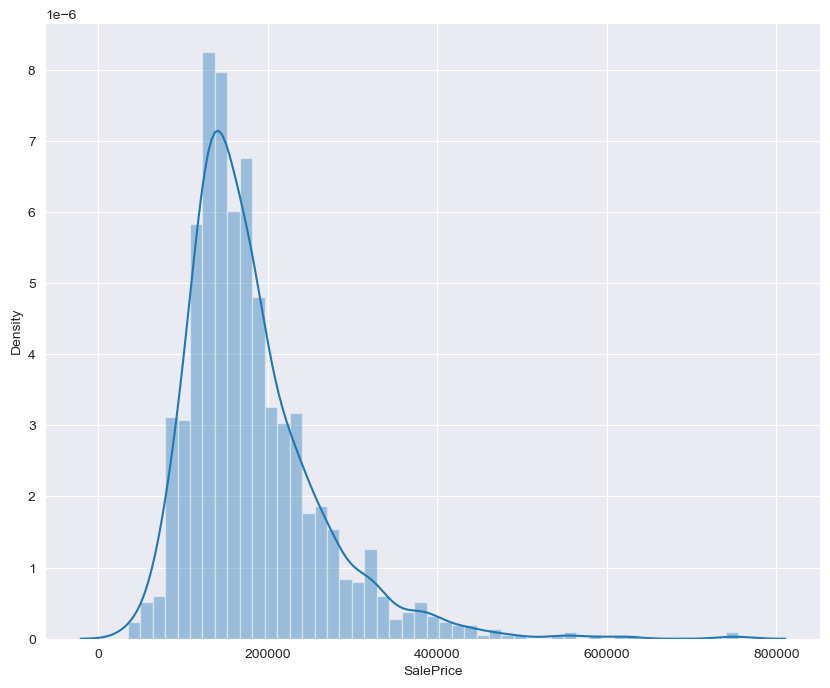

In [430]:
## First, analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'])

'SalePrice' target variable is right skewed. Let's the skewness

In [431]:
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


Skewness of the target variable greater than 1 is high and need to transform into the normal distribution

In [432]:
df['SalePrice']=np.log(df.SalePrice)

<Axes: xlabel='SalePrice', ylabel='Density'>

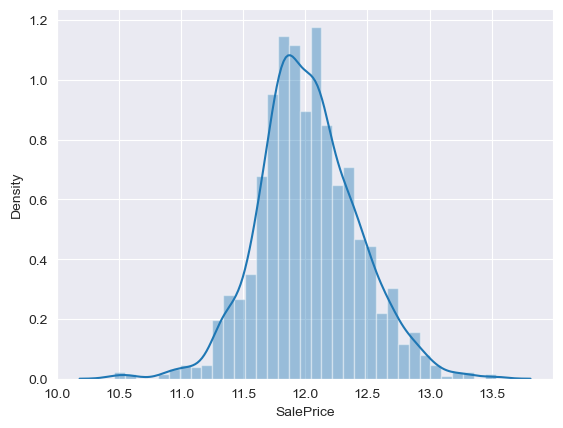

In [433]:
## Verify target variable skewness after log transformation
sns.distplot(df['SalePrice'])

In [434]:
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 0.121335


### Split the dataset into numerical and categorical columns for EDA analysis

In [435]:
## Filter out numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.00,8450,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,12.25
1,2,80.00,9600,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,12.11
2,3,68.00,11250,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,12.32
3,4,60.00,9550,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,11.85
4,5,84.00,14260,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,12.43


In [436]:
df_num.shape

(1460, 34)

In [437]:
## Filter out categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,None,None,None,WD,Normal


In [438]:
df_cat.shape

(1460, 47)

#### EDA for Numerical Columns

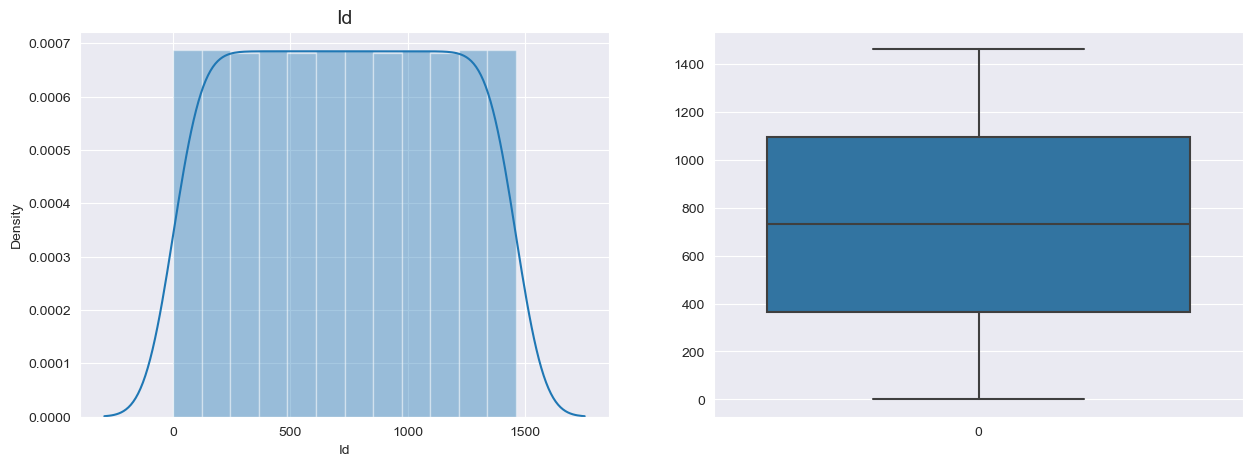

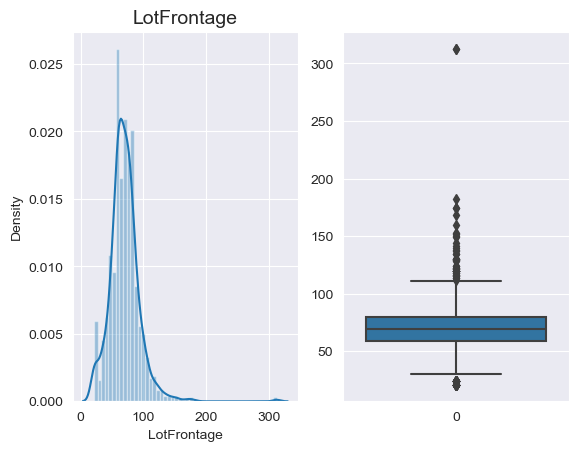

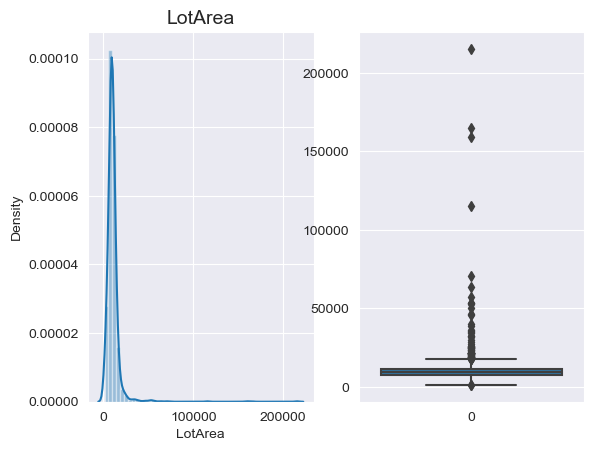

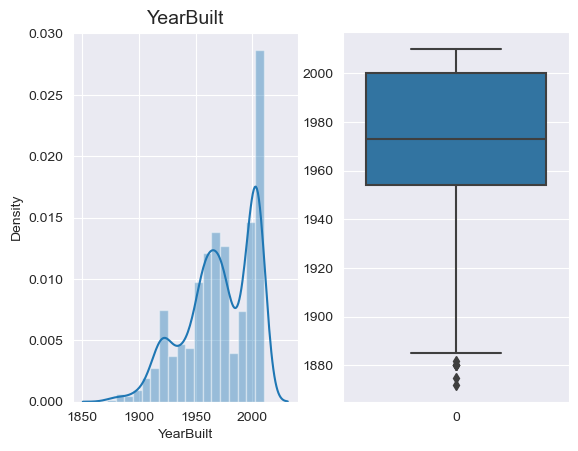

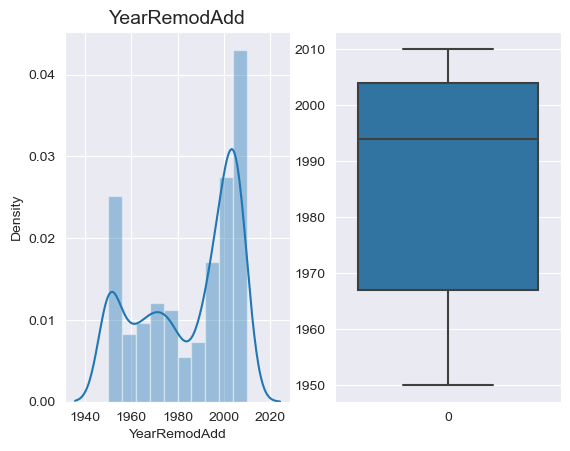

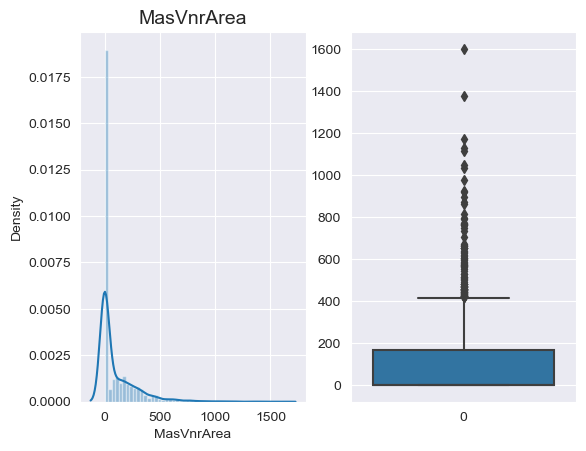

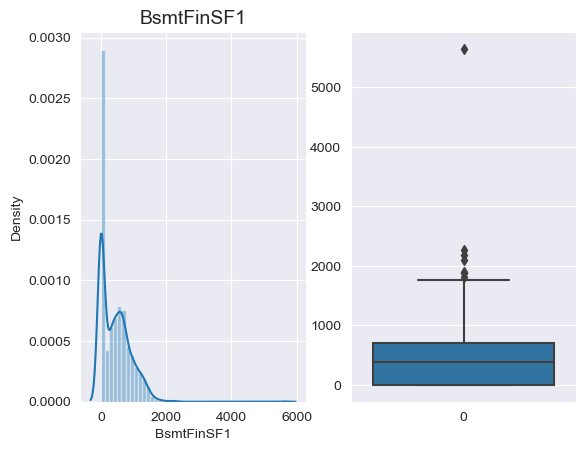

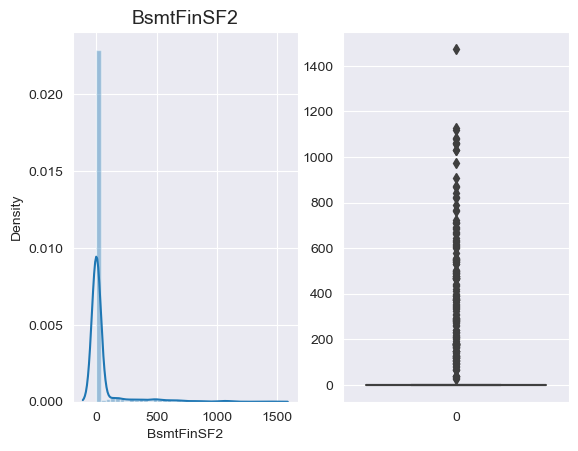

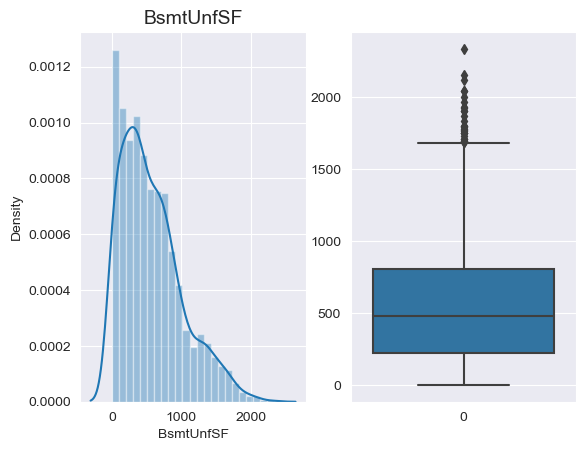

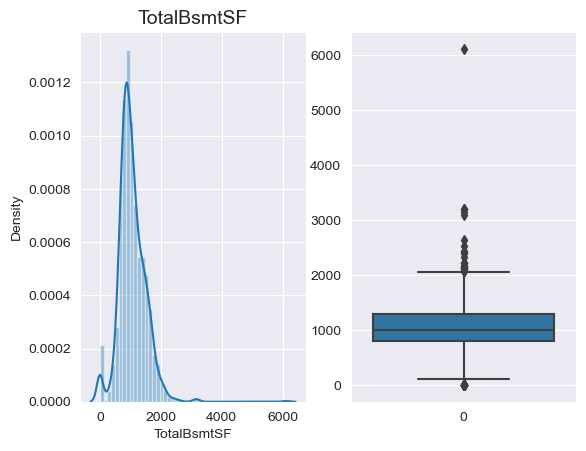

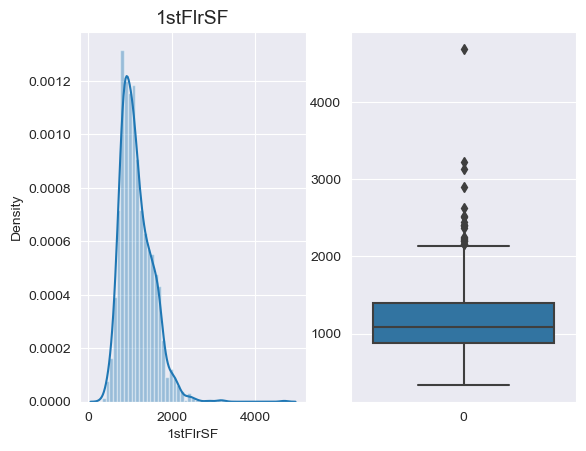

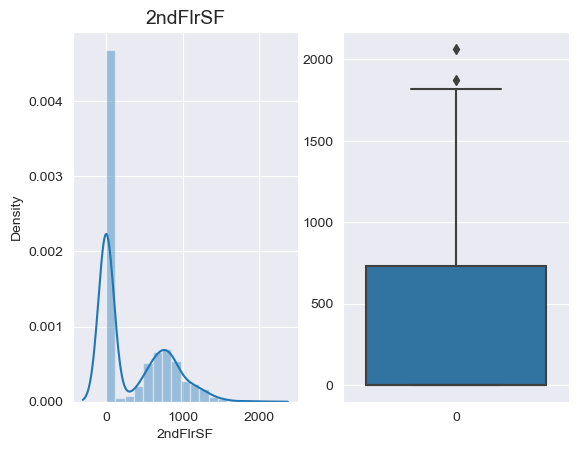

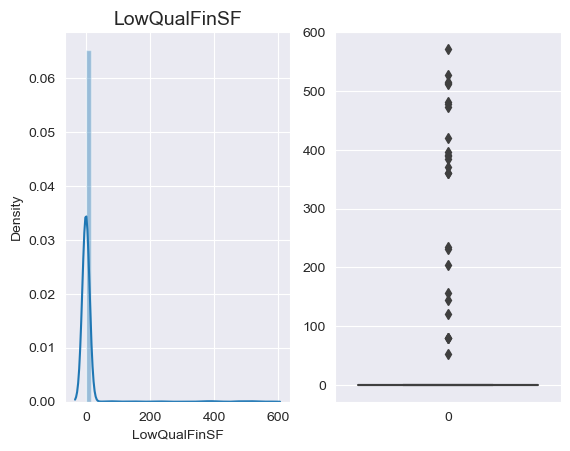

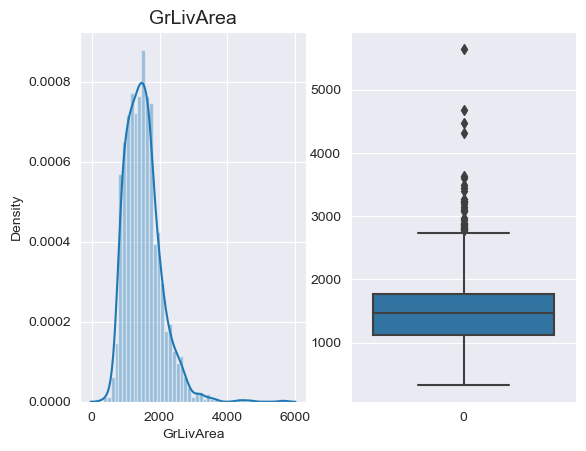

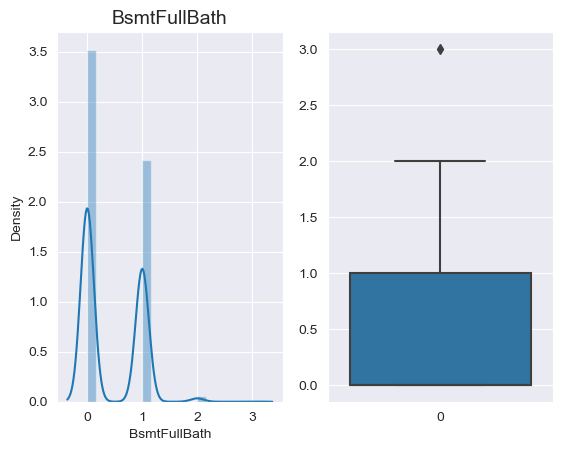

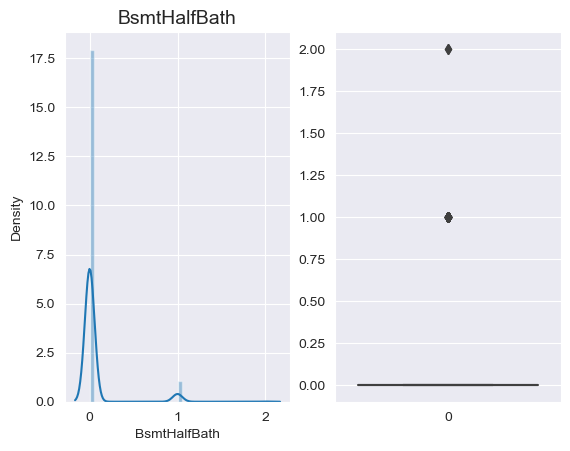

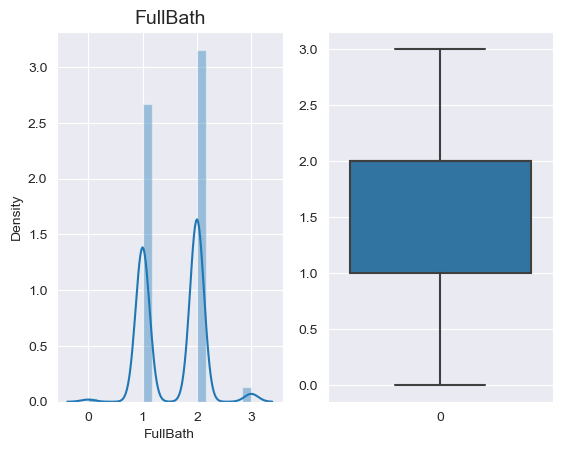

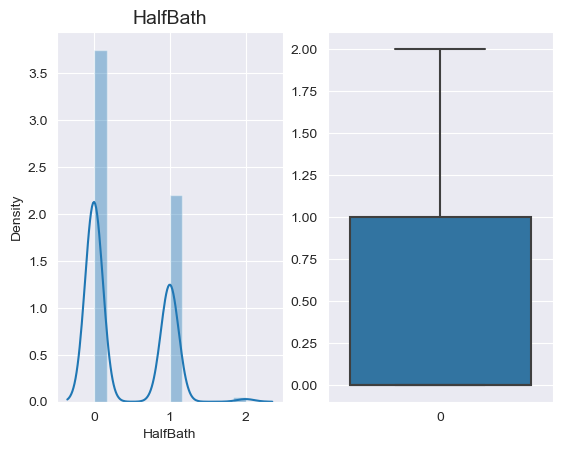

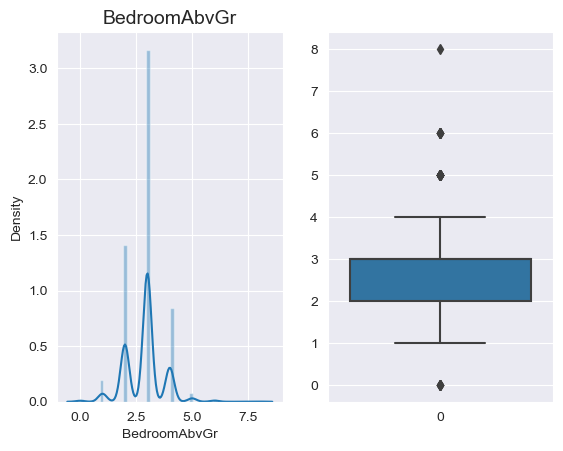

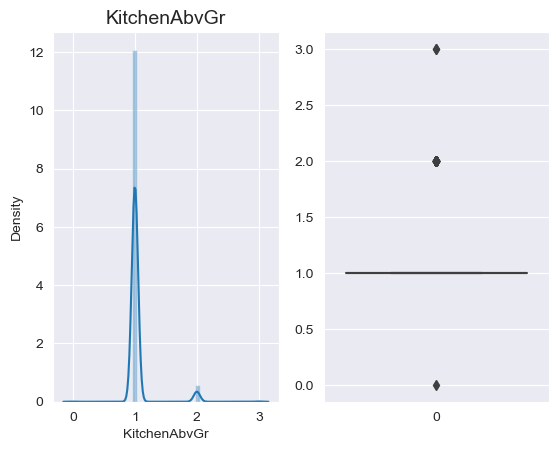

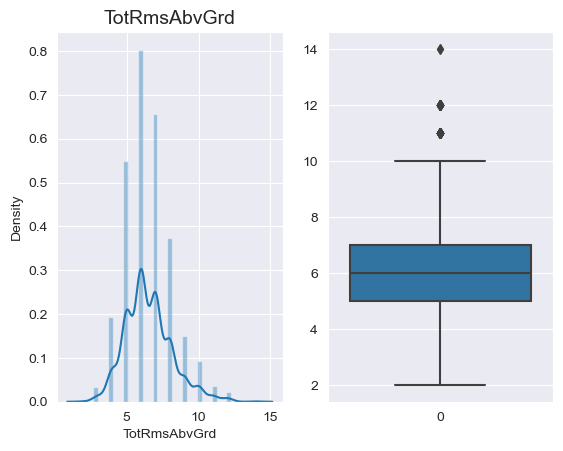

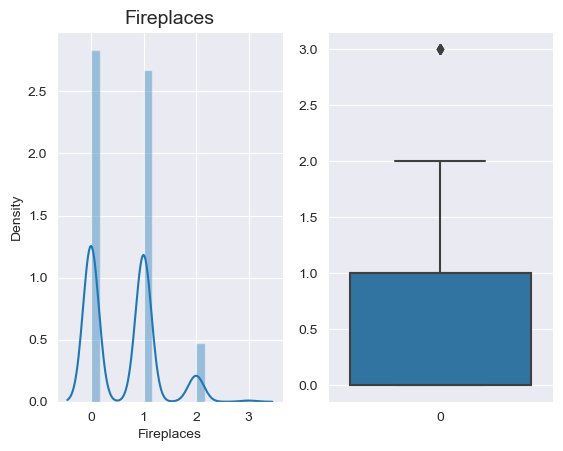

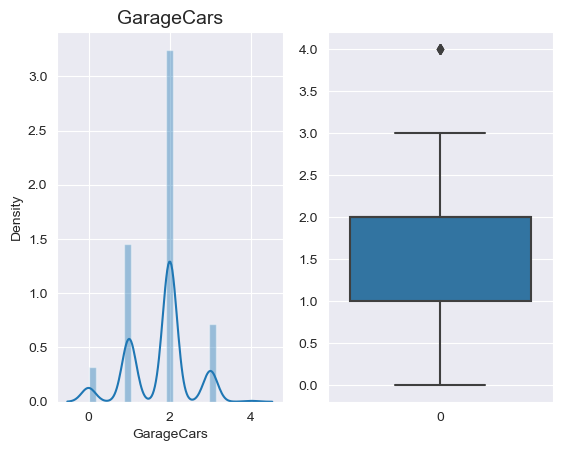

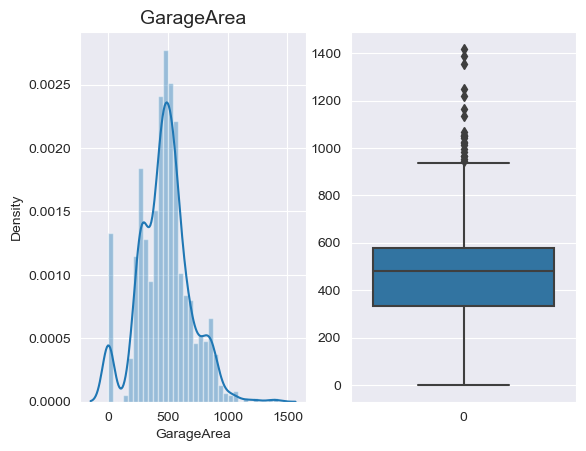

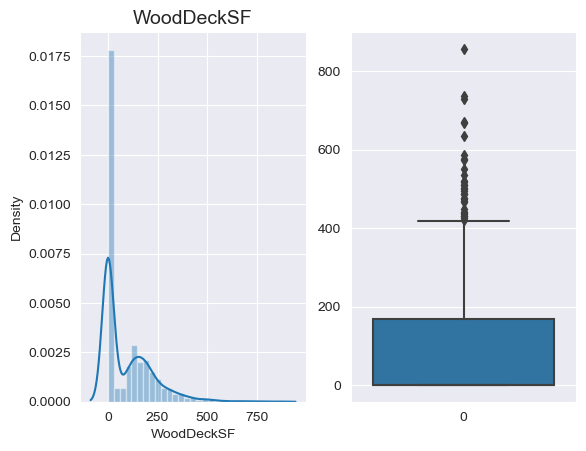

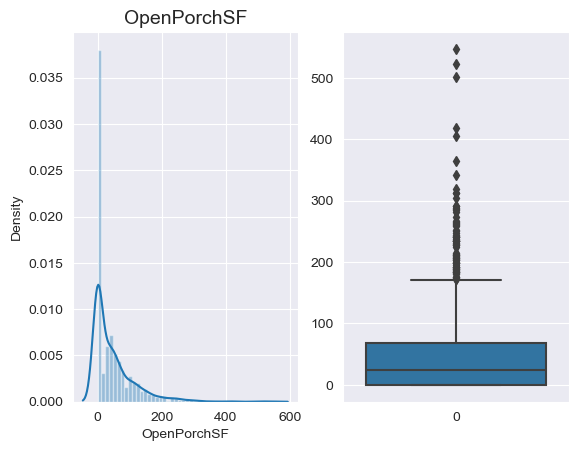

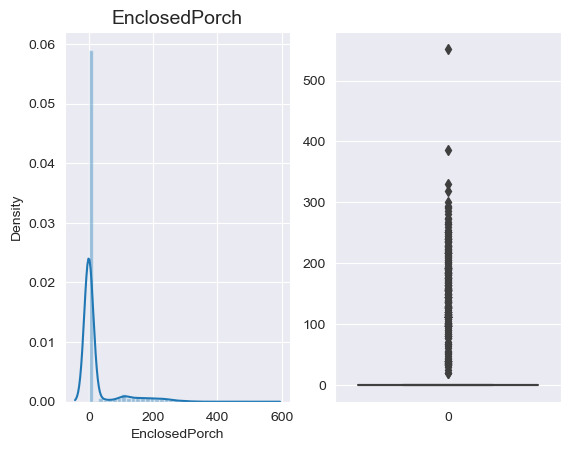

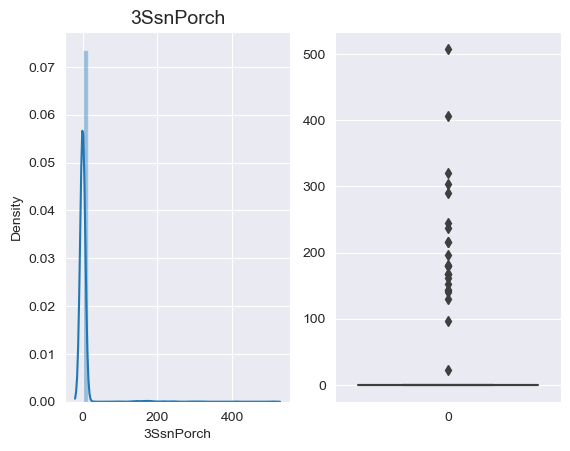

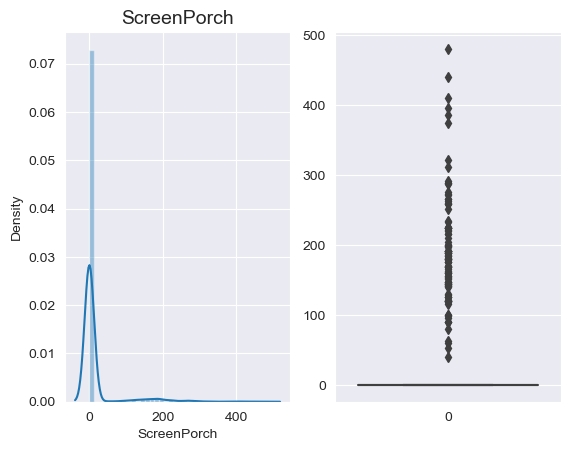

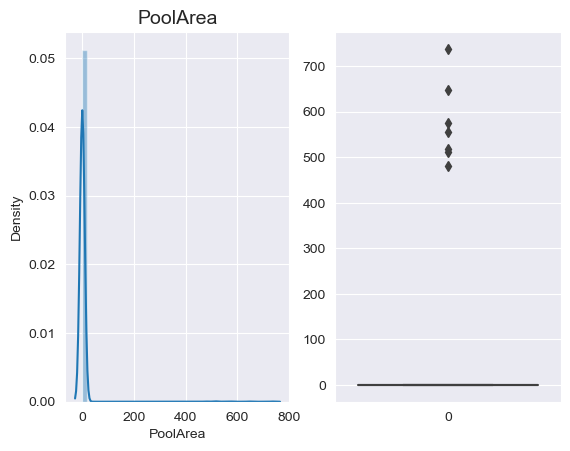

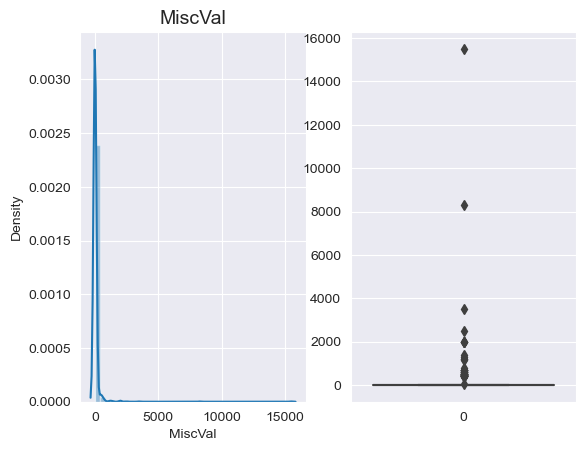

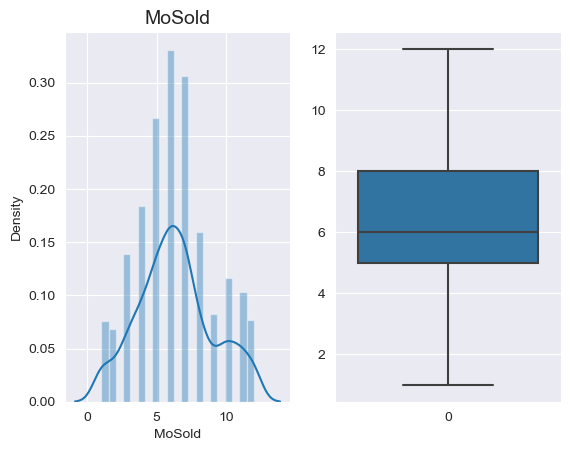

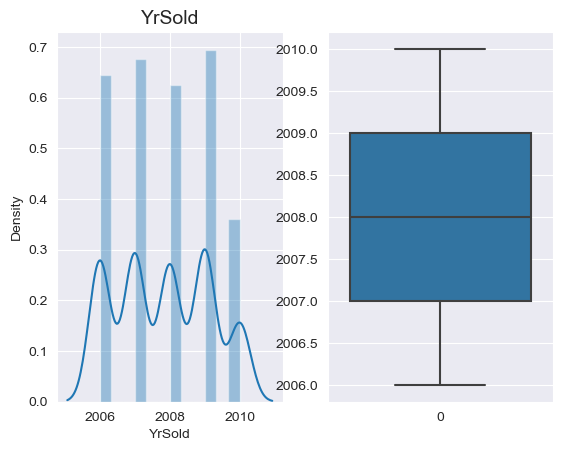

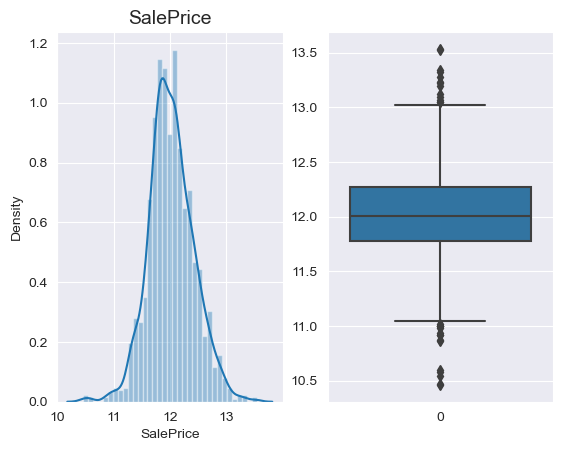

In [439]:
plt.figure(figsize = (15, 5))

def distribution_and_box_plot(column_name):
    plt.subplot(1, 2, 1)
    plt.title(column_name, fontdict= {'fontsize': 14})
    sns.distplot(df_num[column_name])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[column_name])
    plt.show()
    
for column_name in df_num.columns:
    distribution_and_box_plot(column_name)

Conclution:
- Mostly numerical columns' values are non-normal distributed
- Many columns have outliers and need to treatment.

#### EDA for Categorical Columns

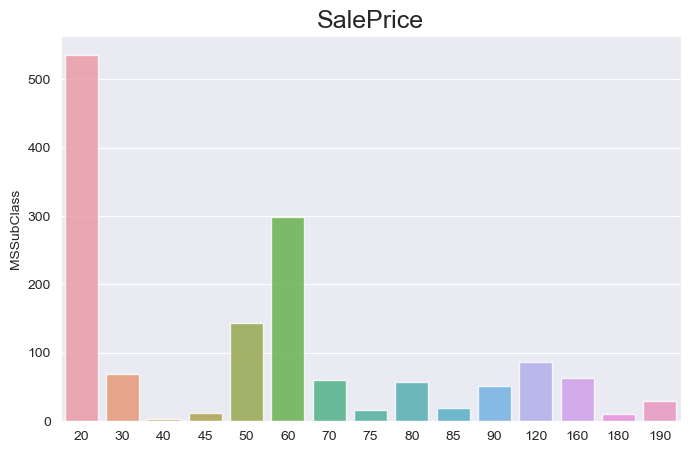

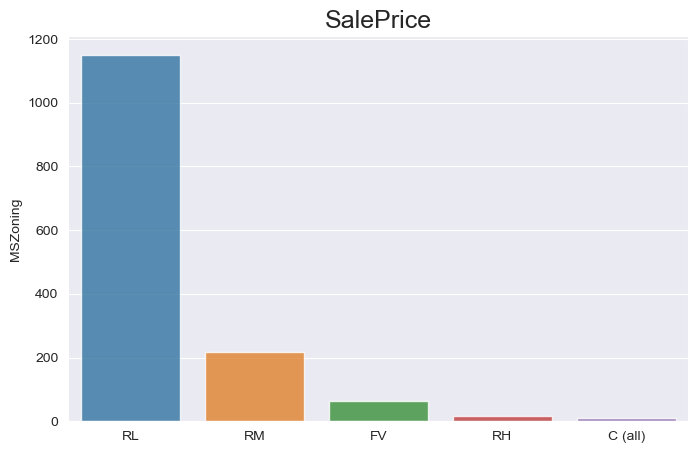

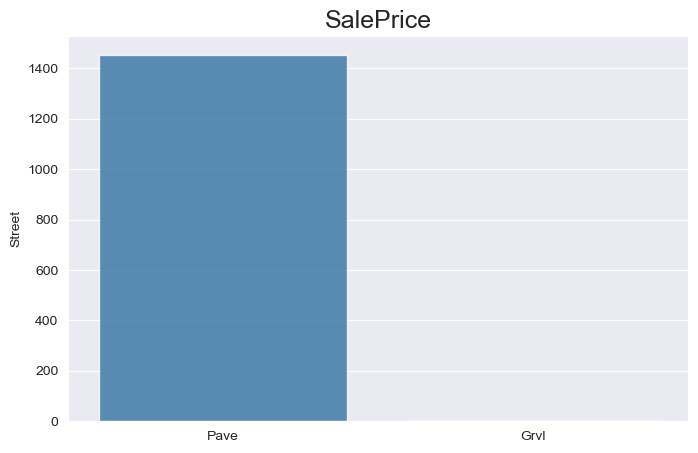

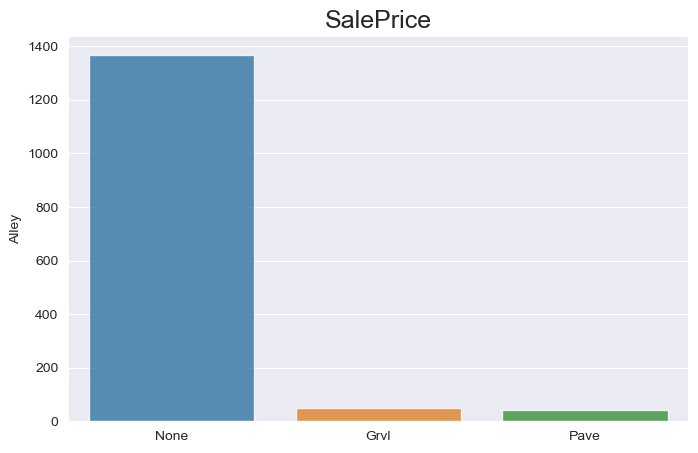

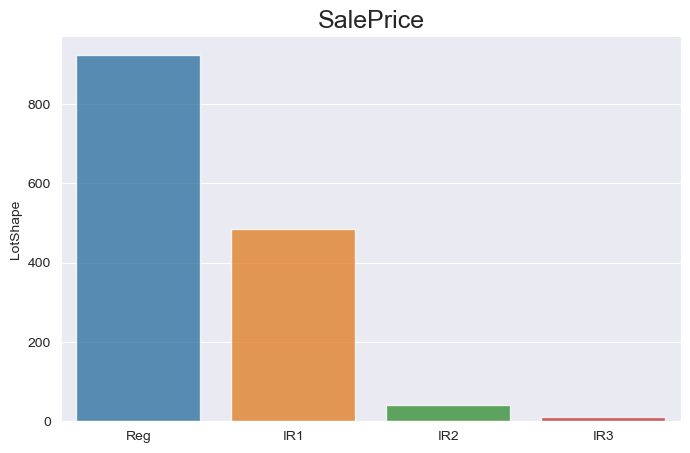

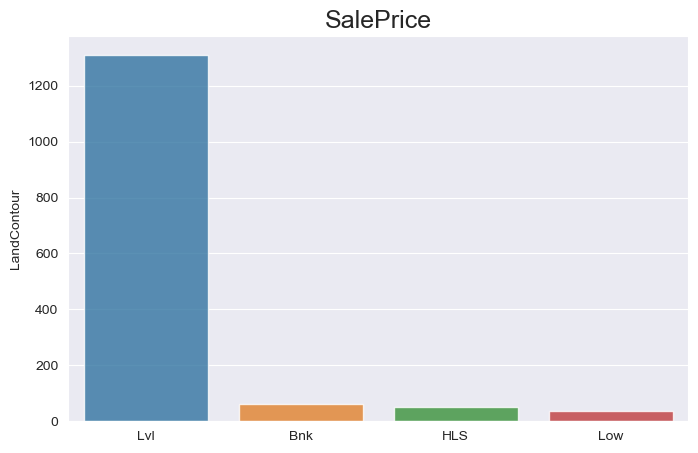

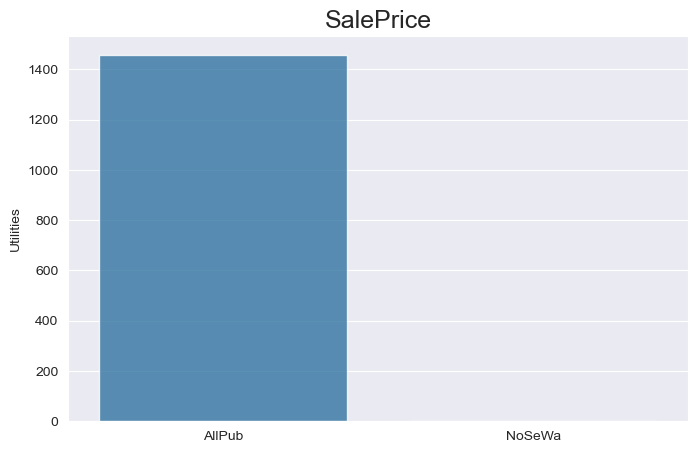

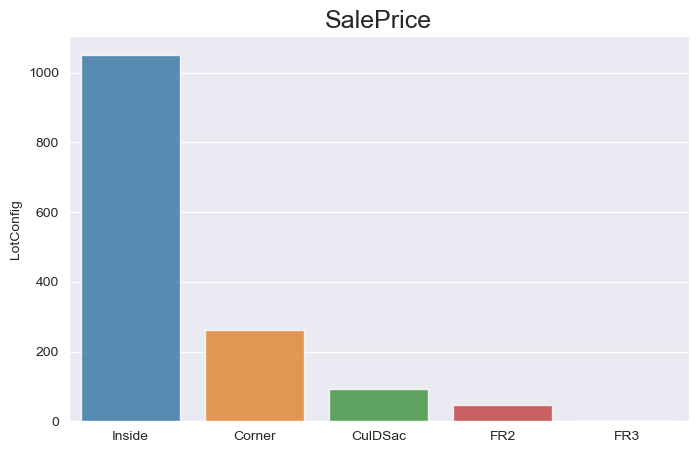

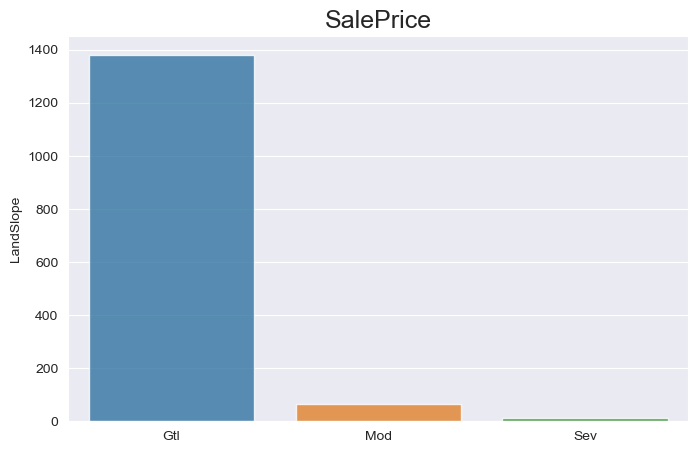

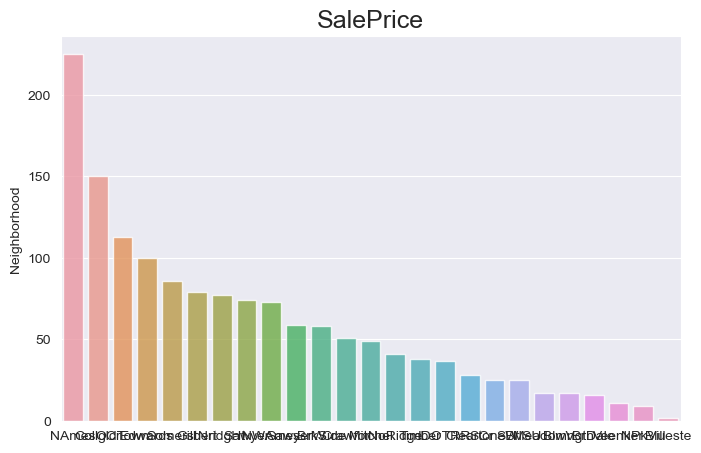

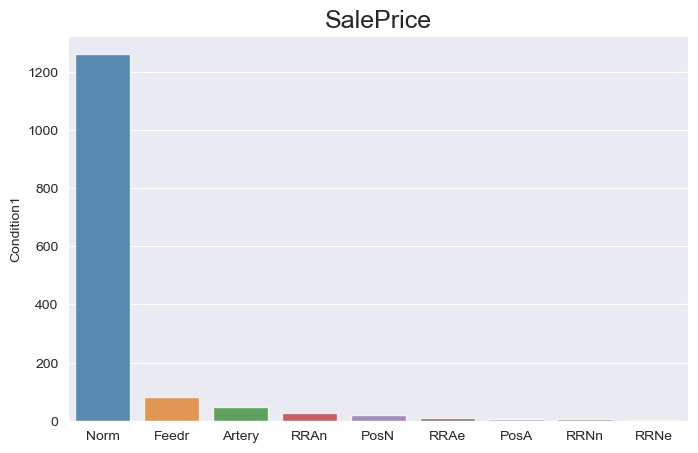

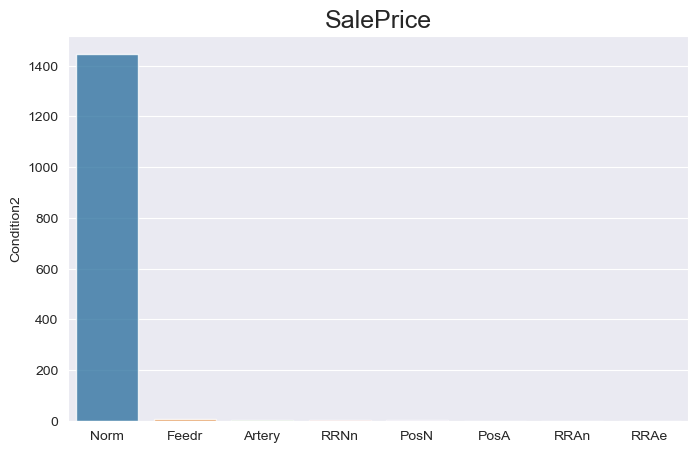

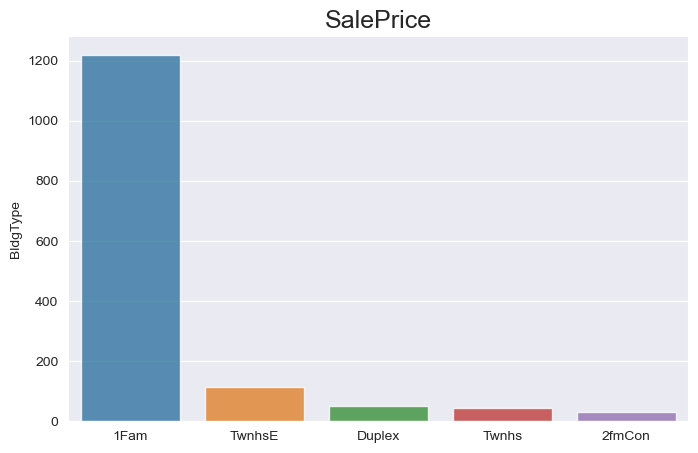

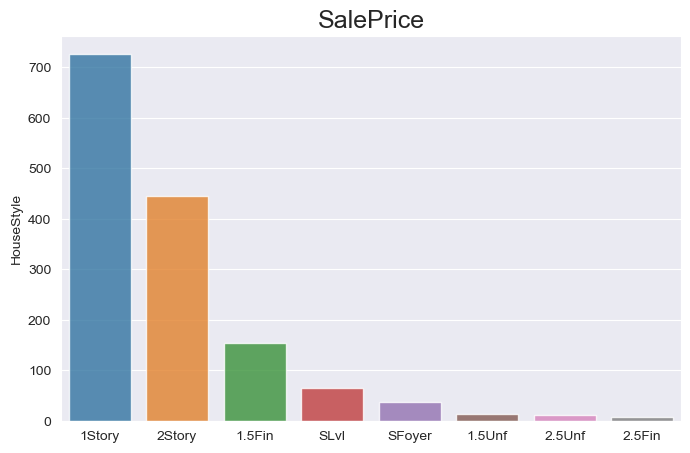

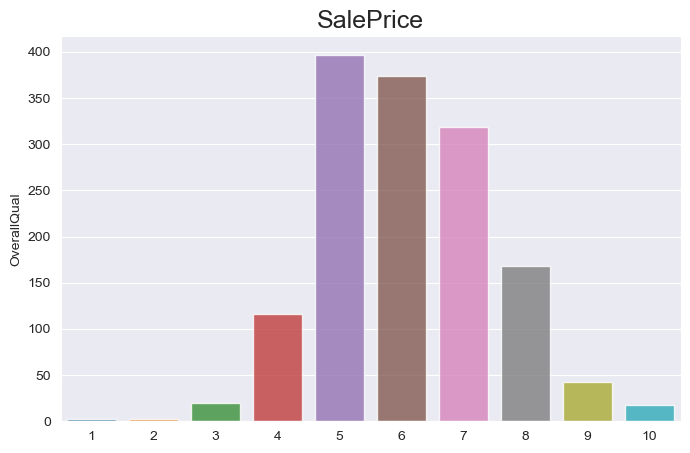

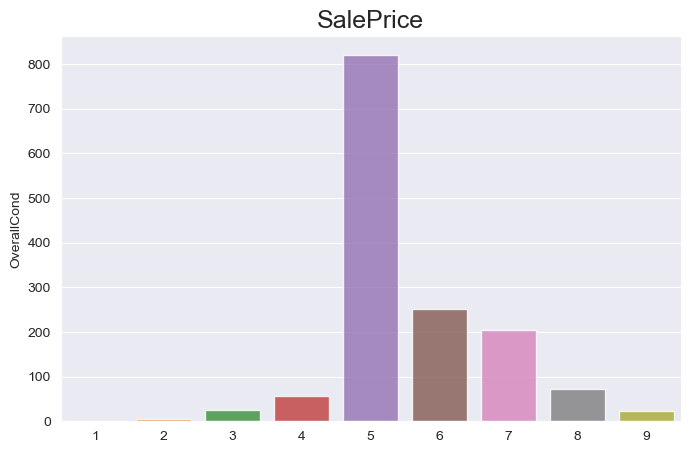

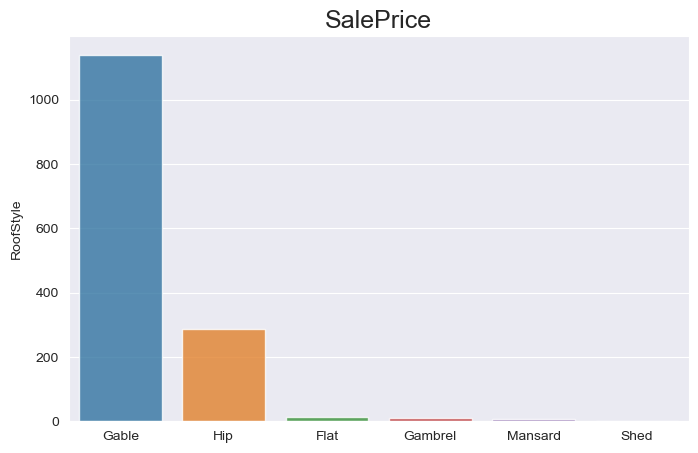

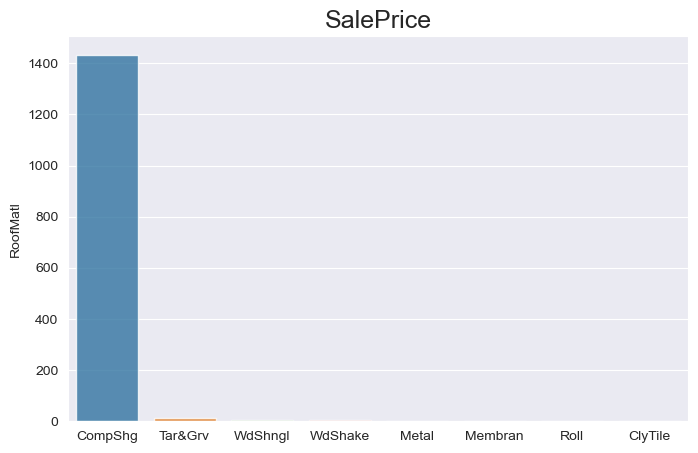

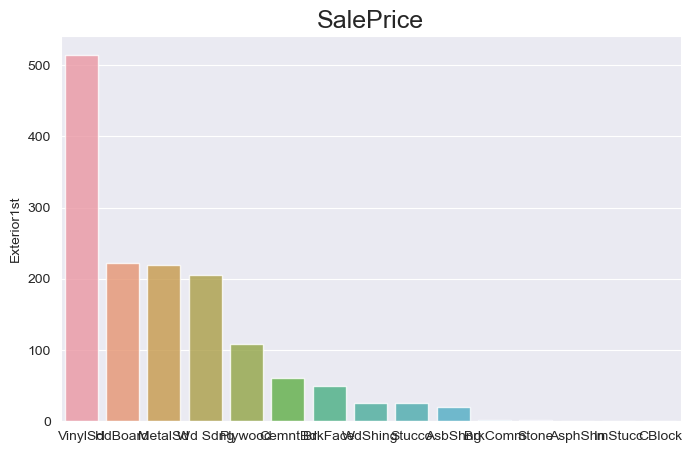

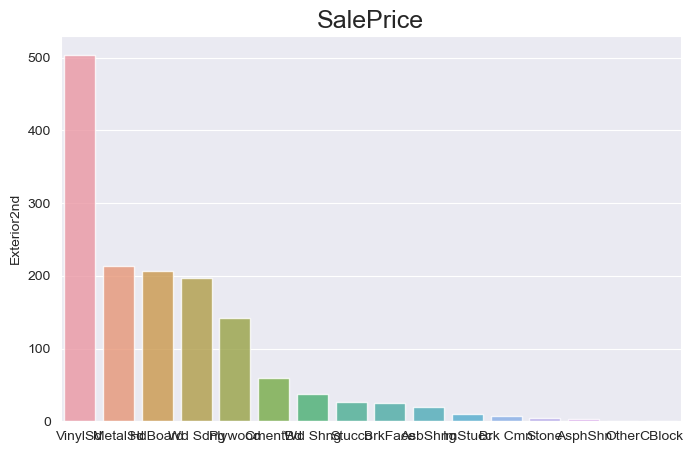

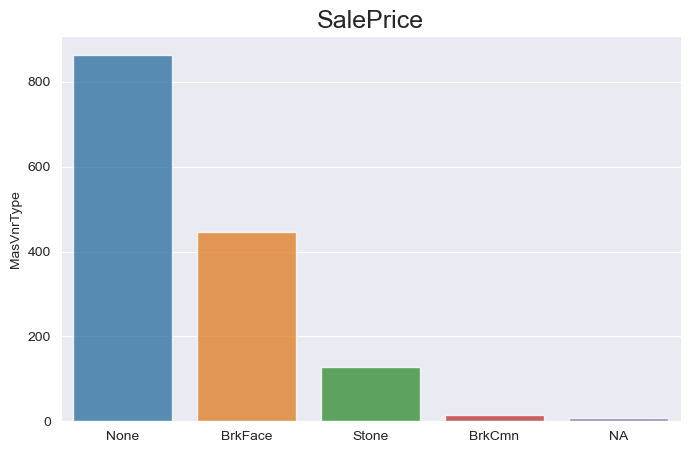

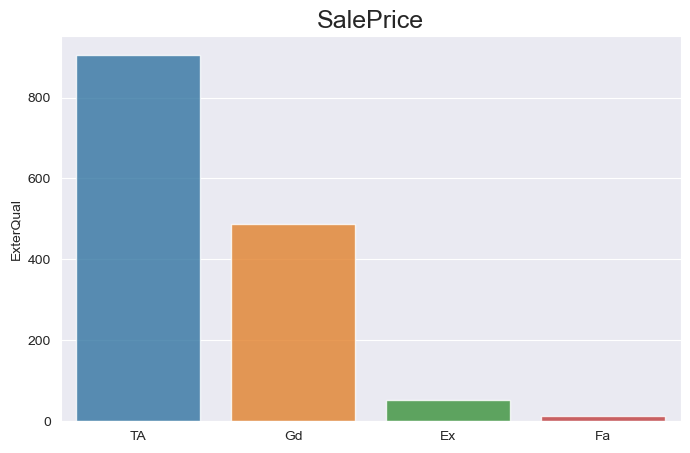

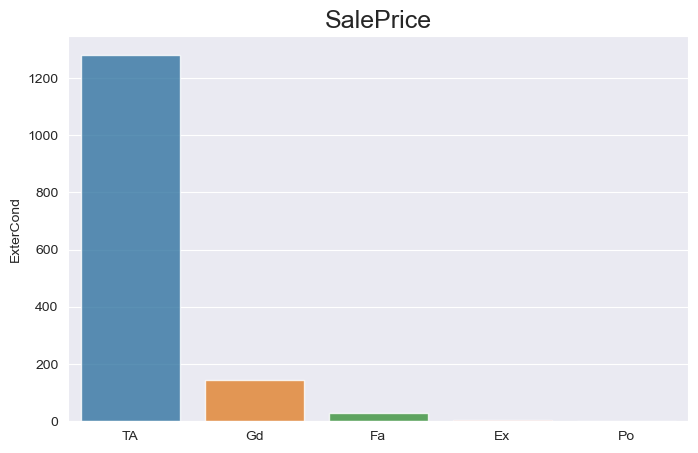

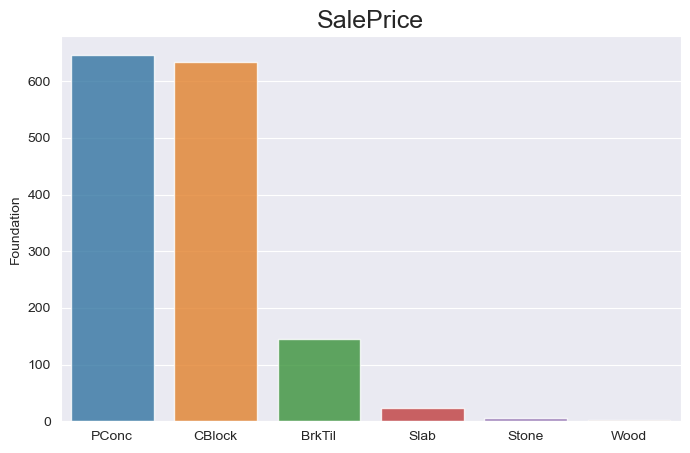

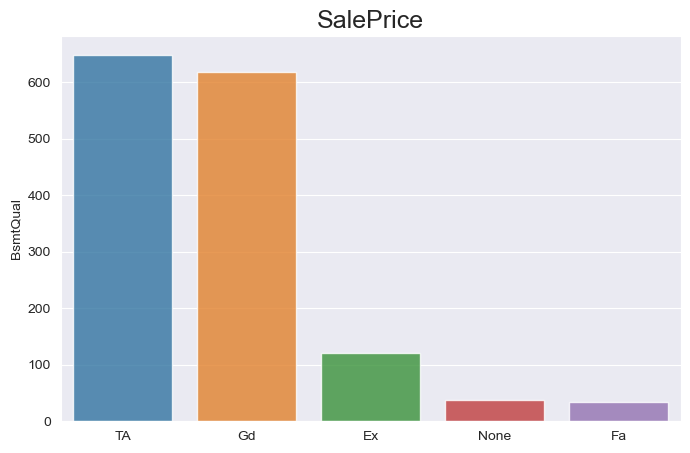

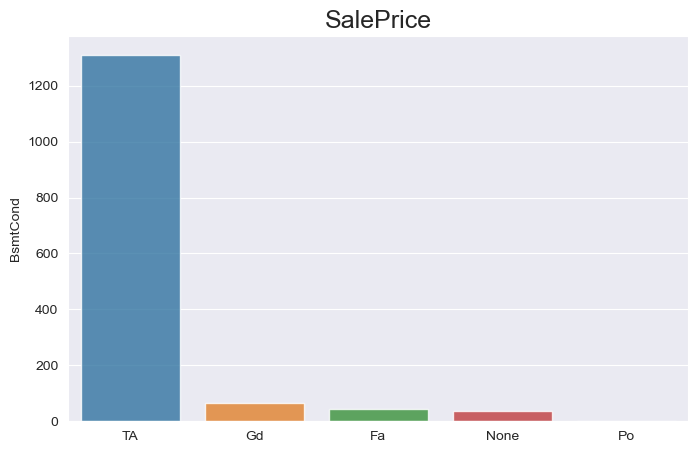

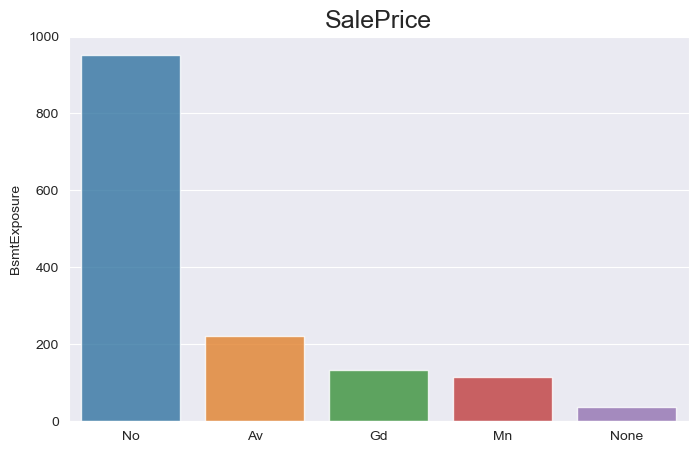

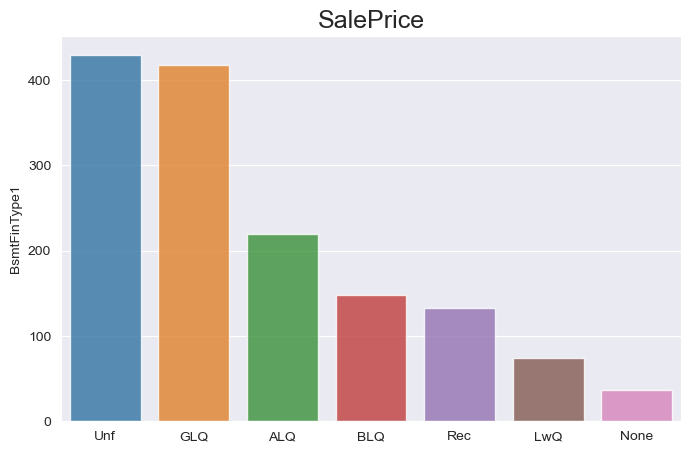

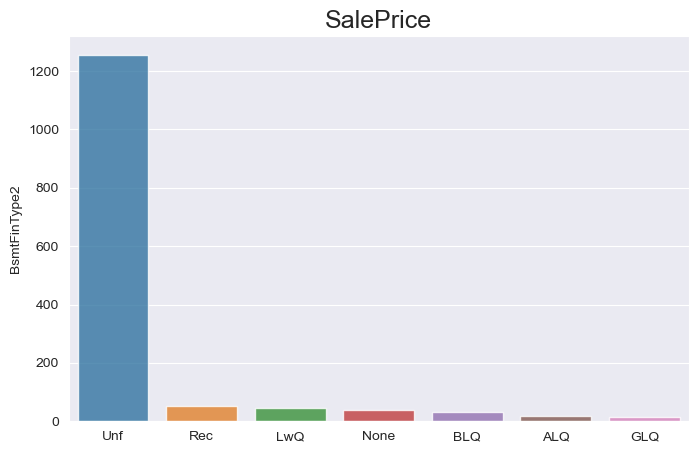

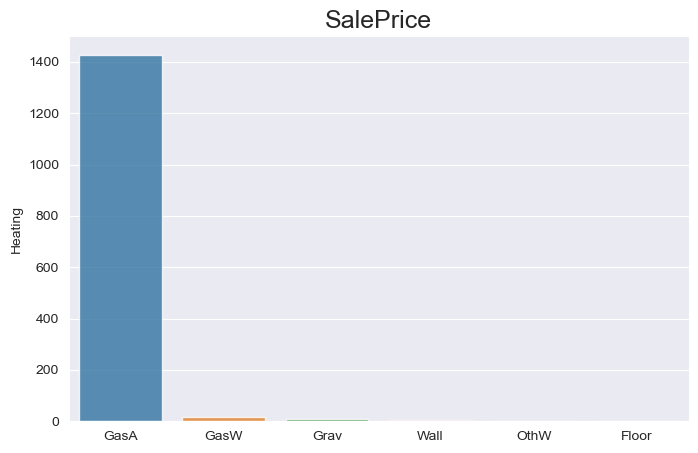

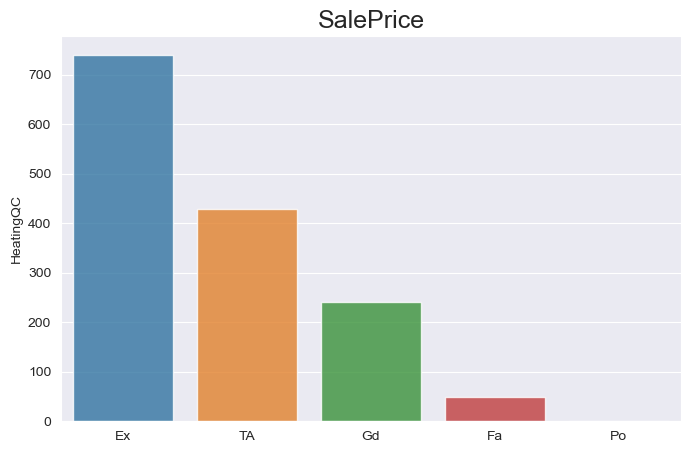

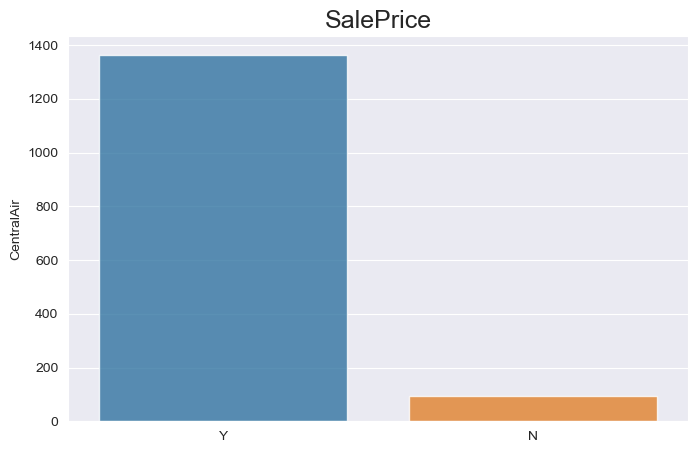

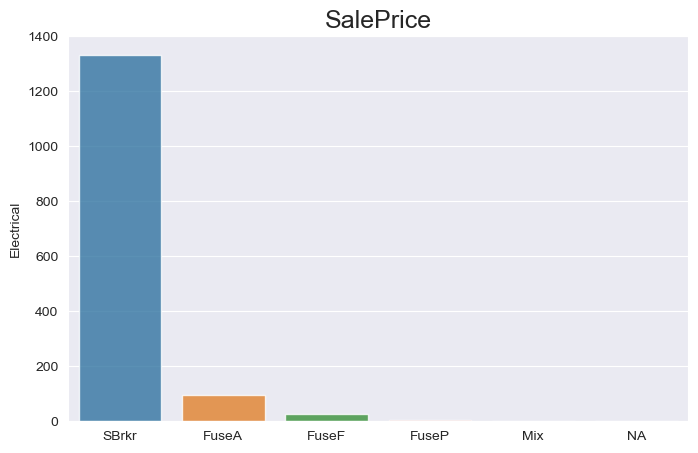

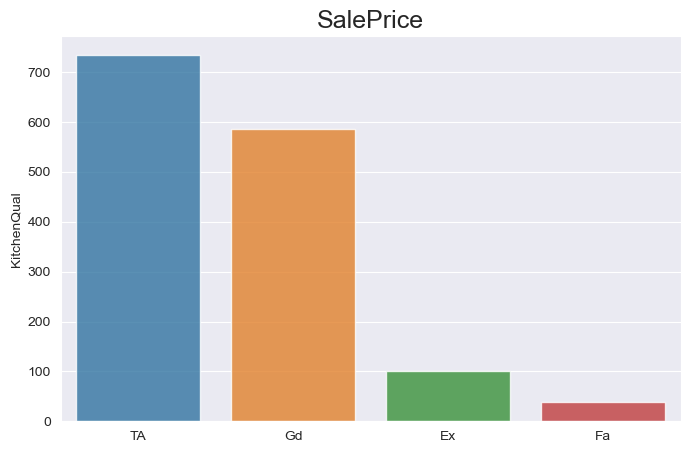

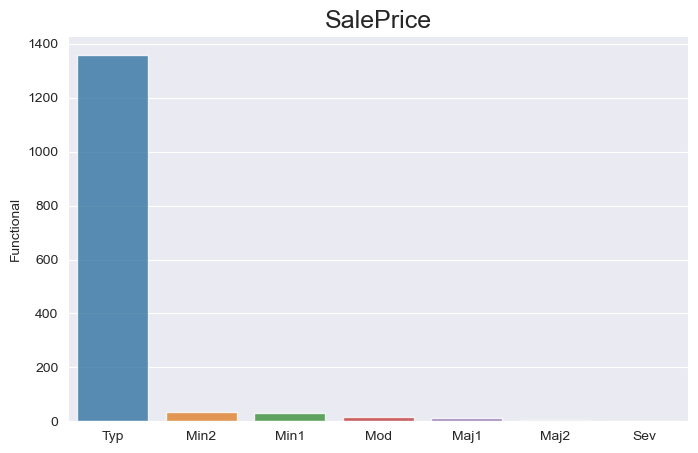

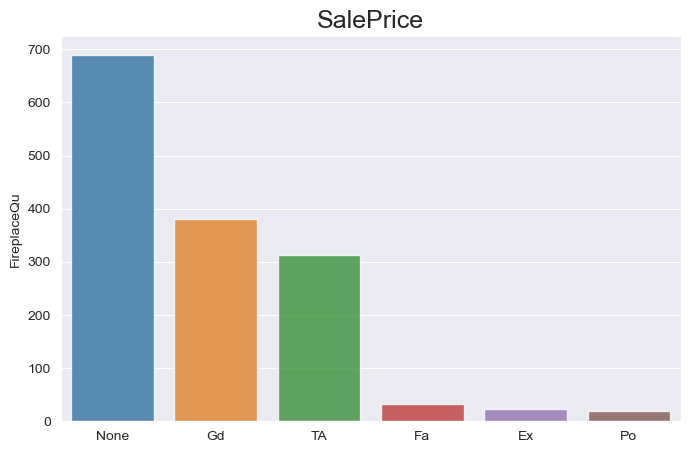

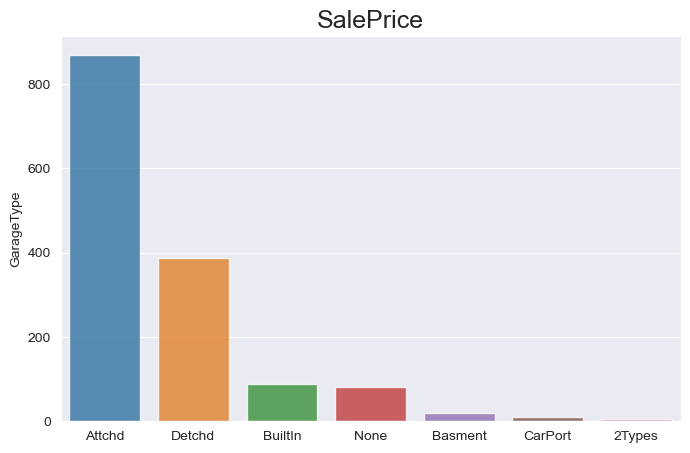

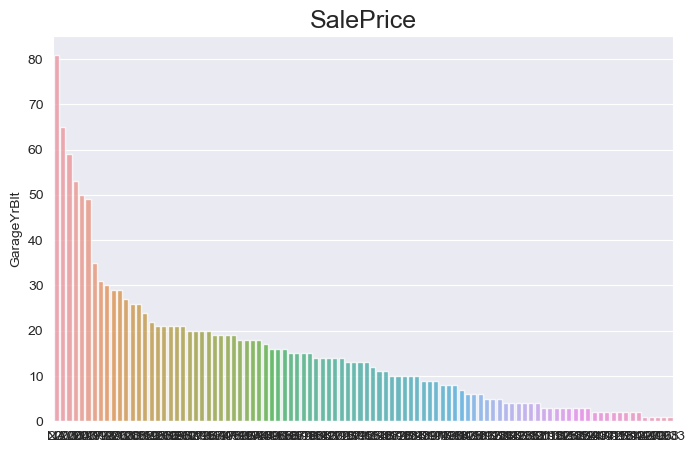

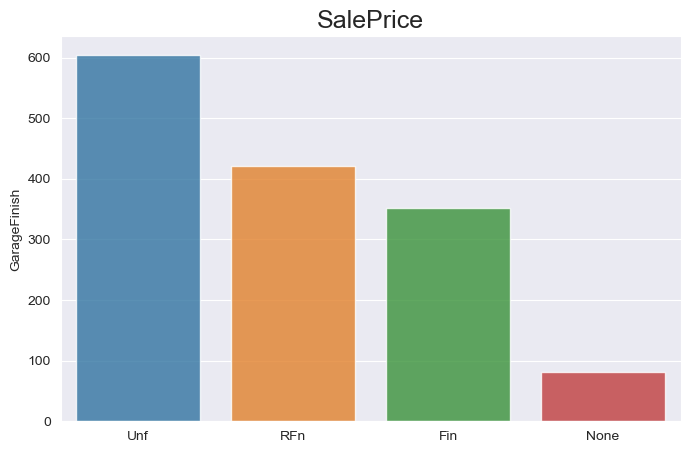

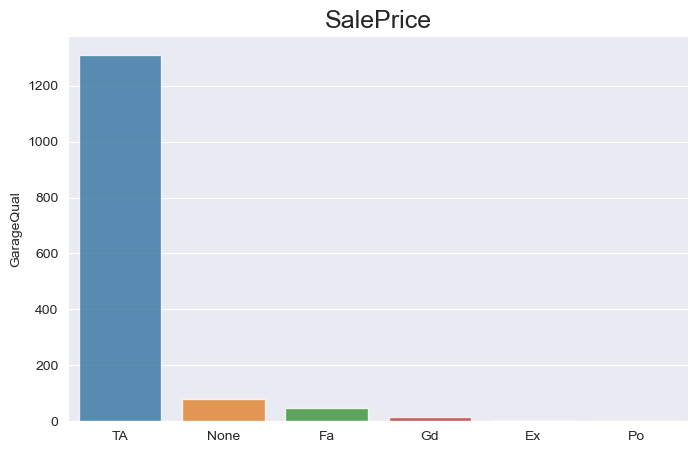

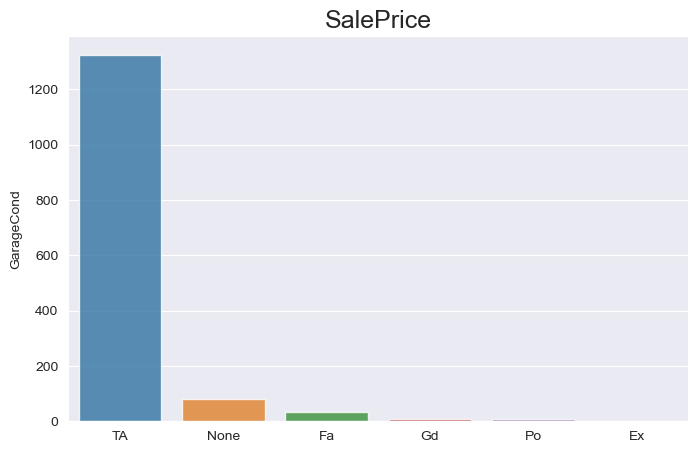

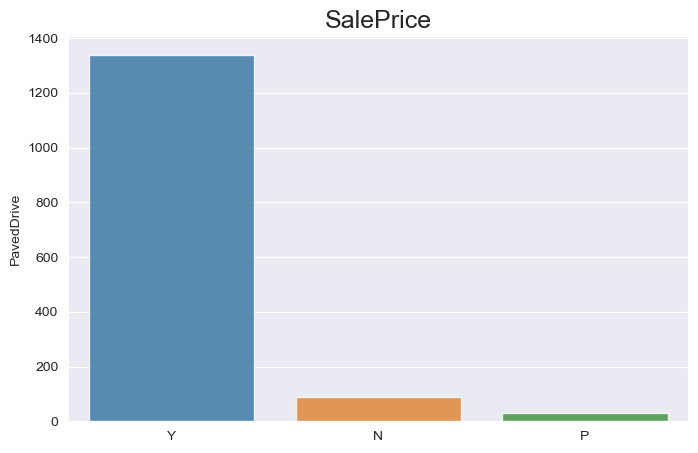

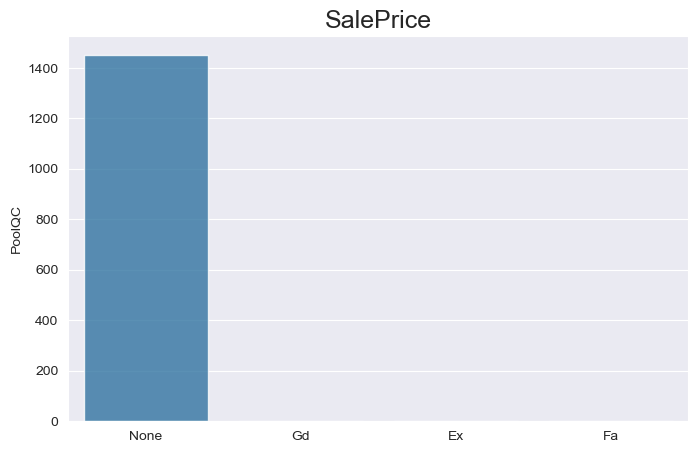

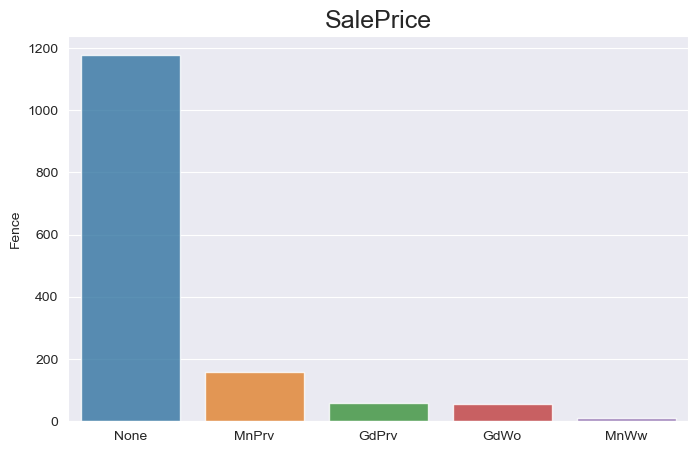

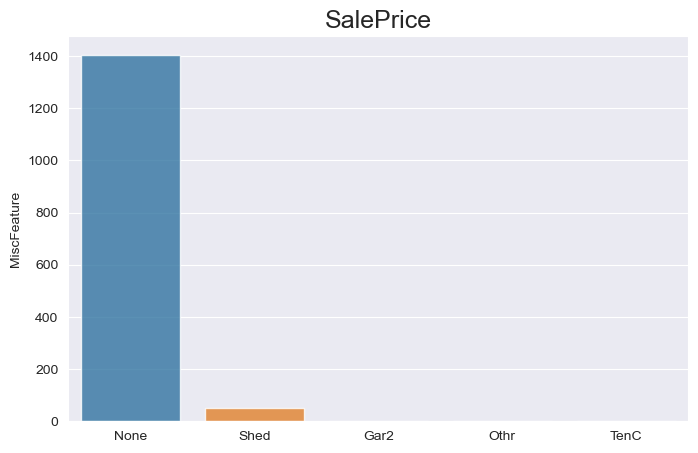

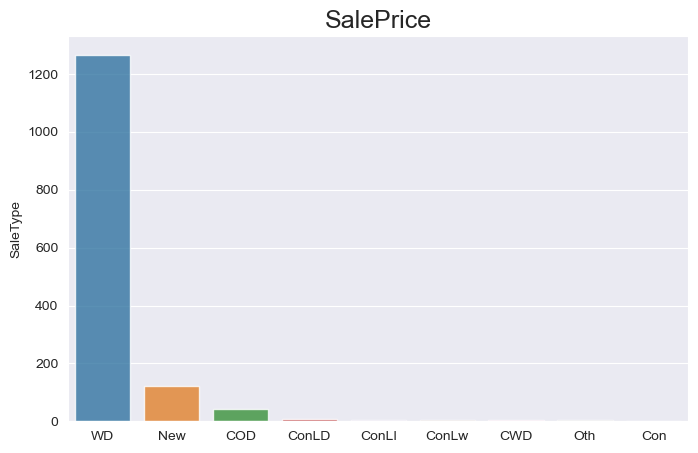

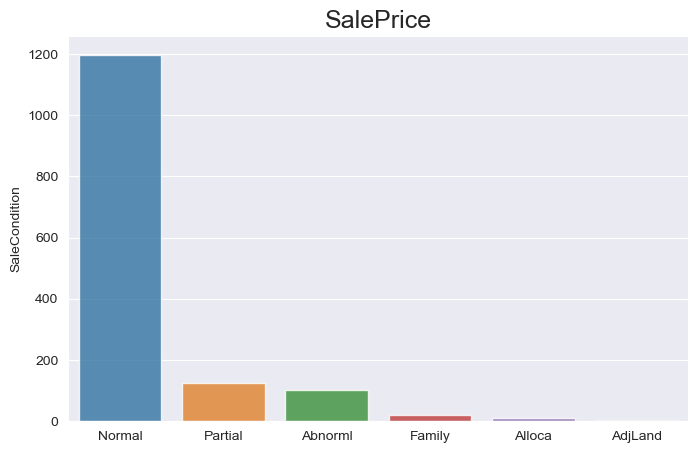

In [440]:

def plot_barplot(column_name):
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=df_cat[column_name].value_counts().index, y=df_cat[column_name].value_counts(), alpha=0.8)
    plt.show()
    
for column_name in df_cat.columns:
    plot_barplot(column_name)


Observation:
- After analysing the barplot on categorical variables, we didn't find any variable with single unique value which we can remove.

### Bivariate Analysis

<Axes: >

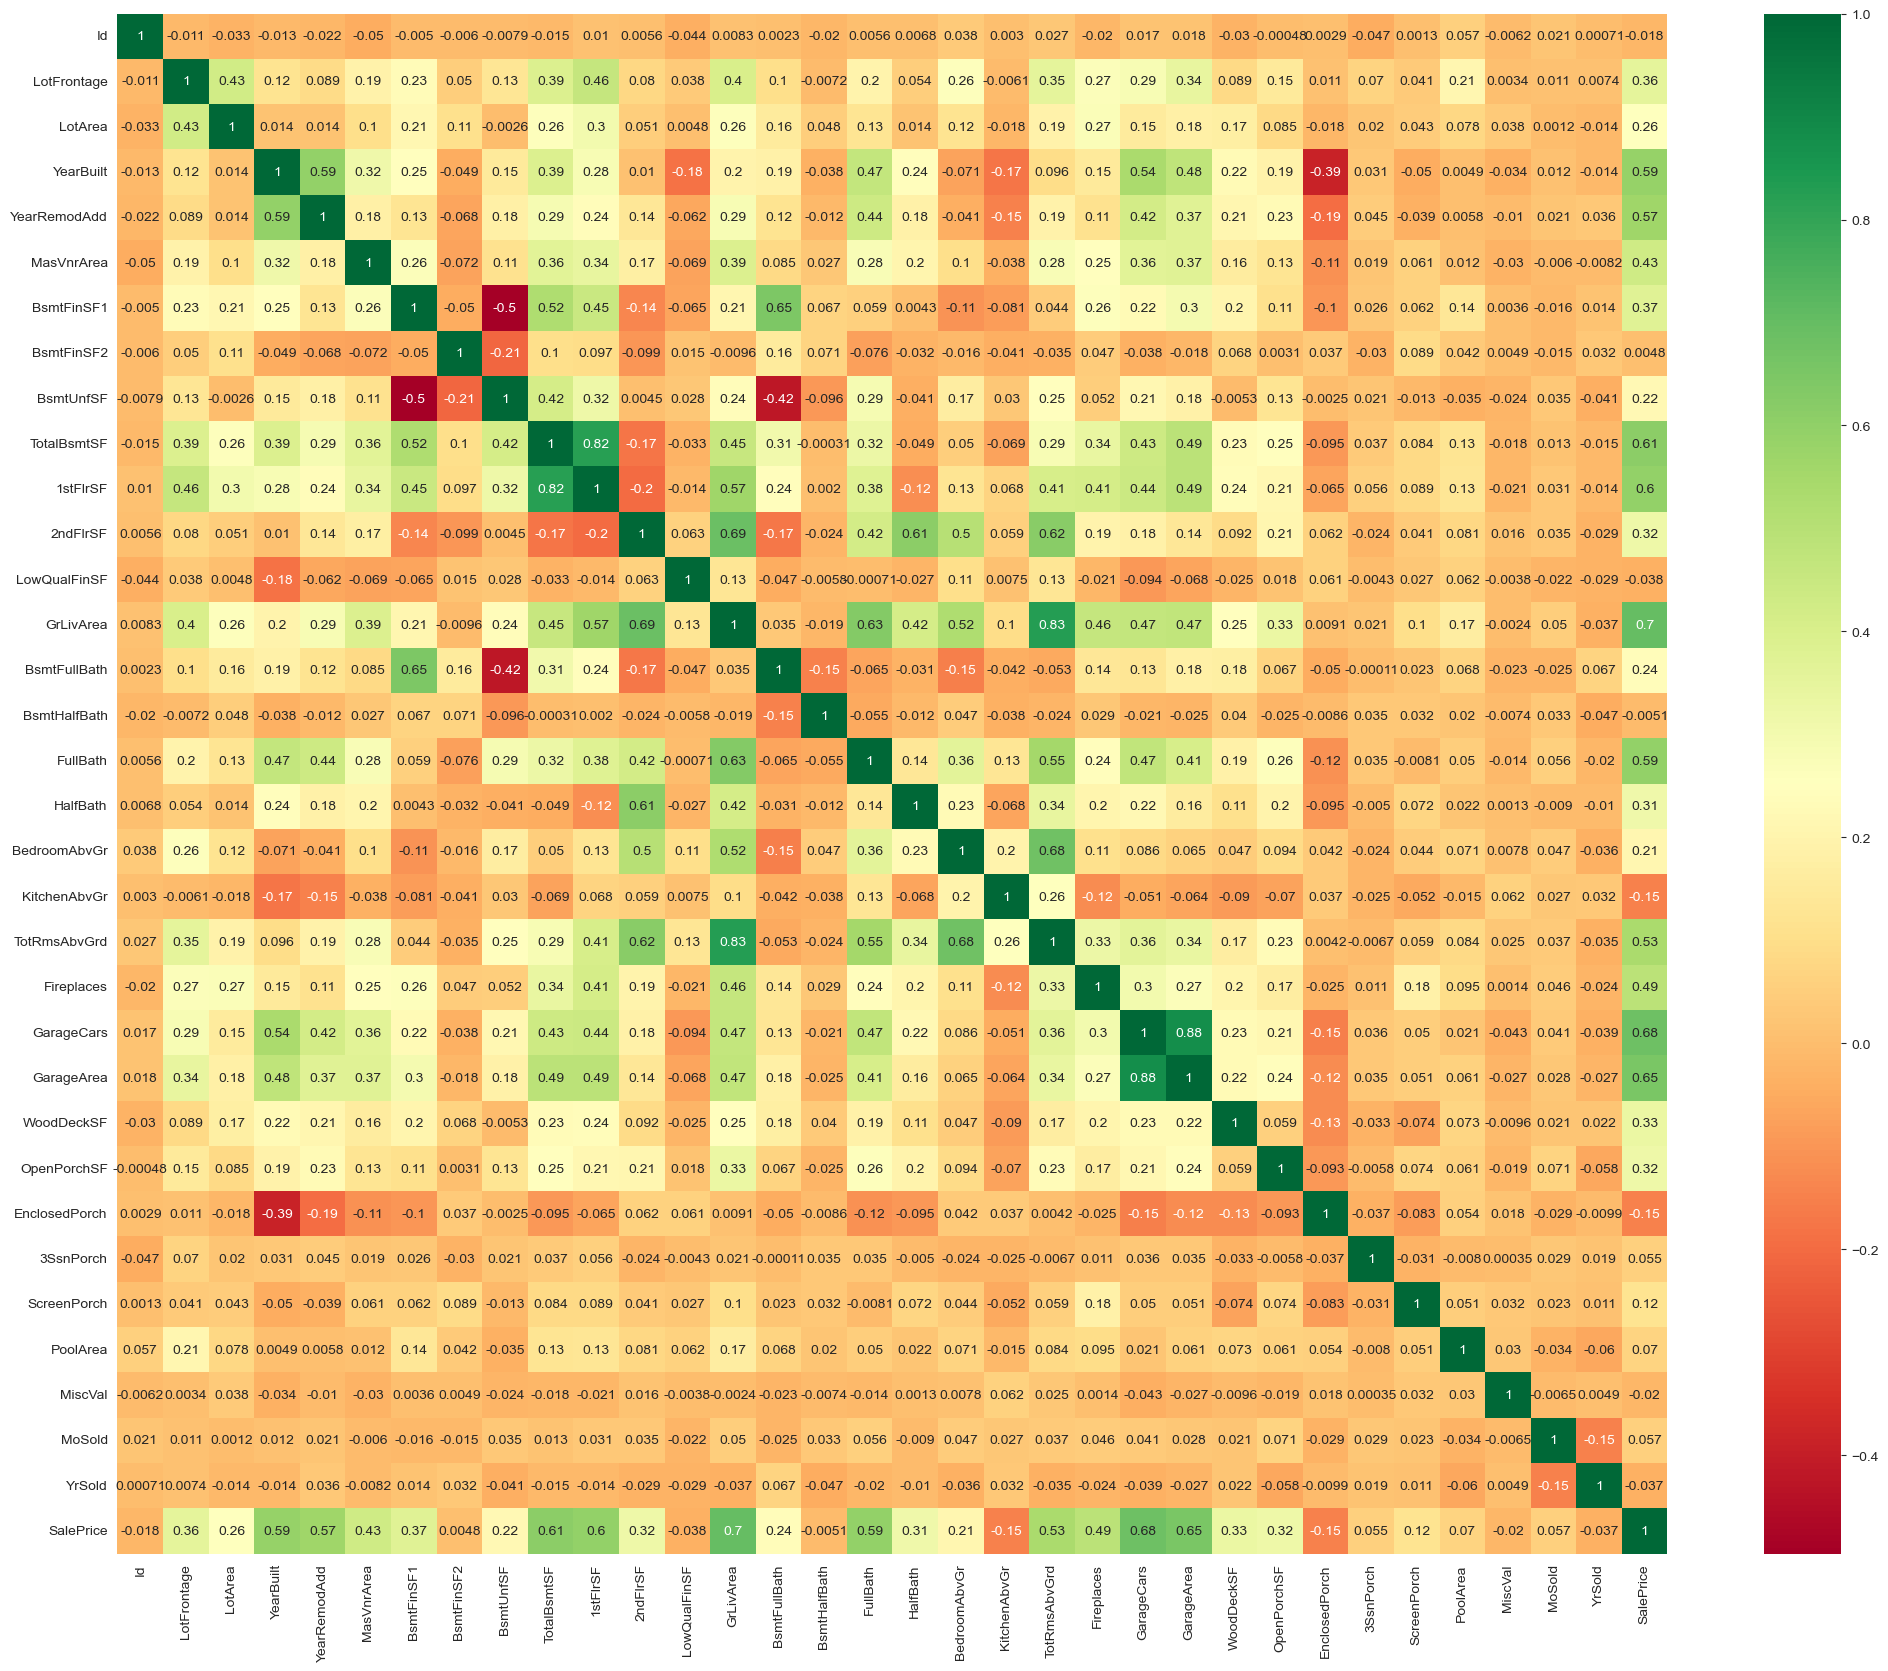

In [441]:
## Draw the heatmap plot to find out correlations b/w numerical variables

plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn')

Observation:
 - Some of the columns have high correlation b/w them
 - A few columns(GrLivArea, GarageCars, CarageArea, etc.) are highly correlated to SalePrice
 - A few predictors columns have multicollinearity and choosing Ridge Regression would be better.

## Step 3: Transforming and Handling missing values

In [442]:
## Create new house age from sold and build years.
df['Age'] = df['YrSold'] - df['YearBuilt']

In [443]:
## Drop the YrSold and YearBuilt column
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [444]:
## Verify dataset after remove these two columns
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,12.25,5
1,2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,12.11,31
2,3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,12.32,7
3,4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,11.85,91
4,5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,12.43,8


In [445]:
df.shape

(1460, 80)

## Step 4: Data Cleaning

#### Treatment for missing values

In [446]:
# We have noticed, two columns have missing values
# Find the top 10 missing values' percentage
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

LotFrontage    17.74
MasVnrArea      0.55
Id              0.00
KitchenAbvGr    0.00
GarageYrBlt     0.00
GarageType      0.00
FireplaceQu     0.00
Fireplaces      0.00
Functional      0.00
TotRmsAbvGrd    0.00
dtype: float64

In [447]:
# Replacing missing values with mean value
df_num['LotFrontage'].fillna(df_num['LotFrontage'].mean(), inplace=True)
df_num['MasVnrArea'].fillna(df_num['MasVnrArea'].mean(), inplace=True)


In [448]:
percent_missing = (df_num.isnull().sum() / df_num.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.00
OpenPorchSF     0.00
KitchenAbvGr    0.00
TotRmsAbvGrd    0.00
Fireplaces      0.00
GarageCars      0.00
GarageArea      0.00
WoodDeckSF      0.00
EnclosedPorch   0.00
LotFrontage     0.00
dtype: float64

Result:
- Now there is not missing values in any columns

#### Outlier treatment

<Axes: >

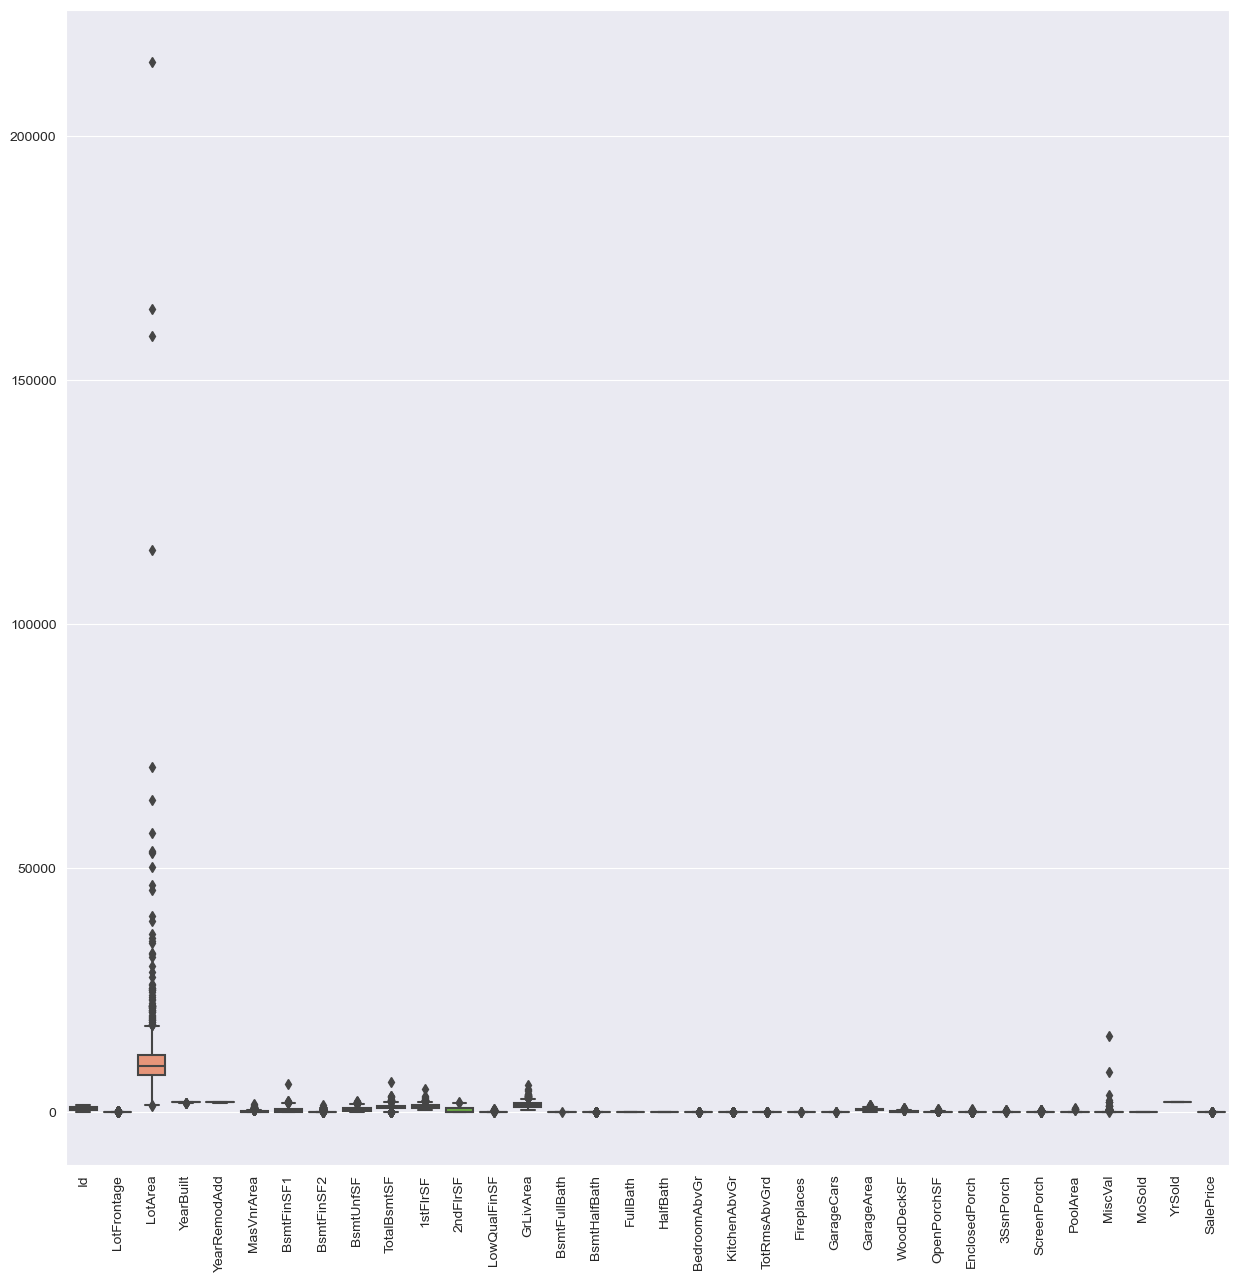

In [449]:
# Visualize outliers of all numerical columns using the boxplots 

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

In [450]:
# Capping outliers to 5% at lower bound and 95% at upper bound
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)


<Axes: >

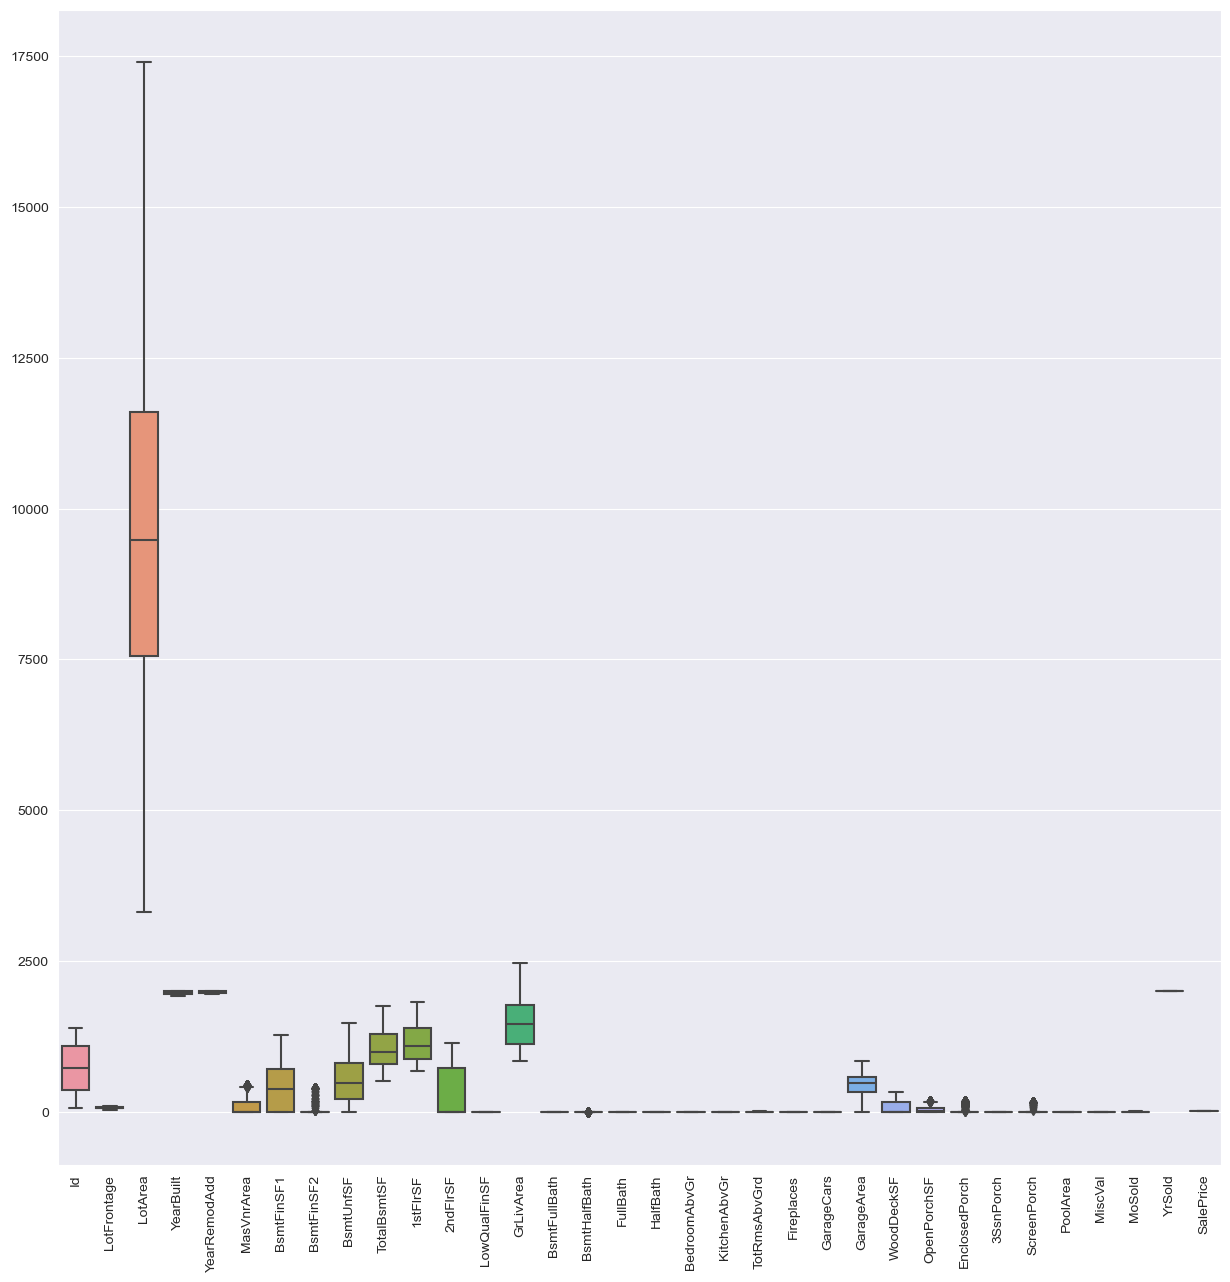

In [451]:
# Verify if outliers after copping them 

plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num)

#### Create Dummy Variables for Categorical variables

In [452]:
df_cat_with_dummy_vars = pd.get_dummies(df_cat, drop_first=True)
df_cat_with_dummy_vars.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,GarageYrBlt_1918,GarageYrBlt_1920,GarageYrBlt_1921,GarageYrBlt_1922,GarageYrBlt_1923,GarageYrBlt_1924,GarageYrBlt_1925,GarageYrBlt_1926,GarageYrBlt_1927,GarageYrBlt_1928,GarageYrBlt_1929,GarageYrBlt_1930,GarageYrBlt_1931,GarageYrBlt_1932,GarageYrBlt_1933,GarageYrBlt_1934,GarageYrBlt_1935,GarageYrBlt_1936,GarageYrBlt_1937,GarageYrBlt_1938,Garag

In [453]:
df_cat_encoded.shape

(1460, 353)

In [454]:
# Concatenation of categorical and numerical variable
df = pd.concat([df_num, df_cat_with_dummy_vars], axis=1)
df.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,Gara

In [455]:
df.shape

(1460, 387)

### Step 5: Model Building and Evaluation
- Using Ridge and Lasso Regression

In [456]:
# Select all features variables expect 'SalePrice' and 'Id'
X = df.drop(['SalePrice', 'Id'], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageYrBlt_1906,GarageYrBlt_1908,GarageYrBlt_1910,GarageYrBlt_1914,GarageYrBlt_1915,GarageYrBlt_1916,

In [457]:
# Select the target variable y to predict
y = df["SalePrice"]
y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

#### Split Train and Test dataset

In [458]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [459]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1021, 385)
(1021,)


#### Scale the numerical columns

In [460]:
# Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
## Create a standard scaler instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test[num_cols].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1436,-0.54,-0.19,-0.03,-0.68,-0.65,0.44,-0.33,-0.72,-0.55,-0.86,-0.81,0.00,-1.42,-0.86,-0.25,-1.11,-0.76,0.19,0.00,-0.99,-0.94,0.32,0.30,-0.80,-0.81,-0.39,0.00,-0.29,0.00,0.00,-0.50,-0.61
57,1.20,0.58,1.11,0.93,-0.65,-1.05,-0.33,0.73,-0.56,-0.87,1.28,0.00,0.50,-0.86,-0.25,0.90,1.31,0.19,0.00,0.34,-0.94,0.32,0.49,-0.80,0.50,-0.39,0.00,-0.29,0.00,0.00,0.66,-1.36
780,-0.36,-0.51,0.80,0.54,-0.38,-1.05,-0.33,1.62,0.50,0.29,-0.81,0.00,-0.55,-0.86,-0.25,0.90,-0.76,0.19,0.00,-0.32,0.65,0.32,-0.32,1.22,-0.42,-0.39,0.00,-0.29,0.00,0.00,-0.11,-0.61
382,0.60,-0.12,1.18,1.03,-0.65,-1.05,-0.33,0.92,-0.34,-0.64,1.27,0.00,0.67,-0.86,-0.25,0.90,1.31,0.19,0.00,1.01,-0.94,0.32,0.85,0.52,0.18,-0.39,0.00,-0.29,0.00,0.00,-0.88,-0.61
1170,0.42,0.07,0.18,-0.38,-0.65,0.21,-0.33,0.05,0.10,-0.11,-0.81,0.00,-0.85,1.16,-0.25,-1.11,-0.76,0.19,0.00,-0.32,0.65,-1.04,-0.54,1.06,-0.81,-0.39,0.00,-0.29,0.00,0.00,0.27,0.13


#### Ridge Regression model building

In [461]:
# 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [462]:
# Display the best optimal alpha value
ridgeCV.best_params_

{'alpha': 10.0}

In [463]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

In [464]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [465]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([ 5.83422800e-03,  2.39961071e-02,  5.14300957e-02,  2.95665542e-02,
       -9.68897003e-04,  8.35354637e-03, -8.61621467e-04, -1.45046883e-02,
        6.09785551e-02,  4.86266782e-03,  3.27978815e-02,  0.00000000e+00,
        8.92983801e-02,  8.25067587e-03, -1.89915131e-03,  1.07370873e-02,
        7.95219167e-03, -8.55475680e-05,  0.00000000e+00, -1.47308049e-03,
        1.04570420e-02,  7.50259668e-03,  2.53123095e-02,  1.14262905e-02,
        5.61732074e-03,  1.79261848e-03,  0.00000000e+00,  5.12777686e-03,
        0.00000000e+00,  0.00000000e+00,  1.59438130e-03, -2.75328311e-03,
       -3.30202498e-02, -9.59497764e-03,  3.40854127e-03,  1.98094304e-03,
       -1.66913291e-02,  4.54151258e-02,  2.51533624e-02, -8.75647602e-04,
        8.45083682e-03, -3.09413179e-02,  5.47023105e-03, -4.13344843e-02,
       -2.66449672e-02, -2.44066229e-02,  3.11468440e-02,  2.32862607e-02,
        2.32804369e-02, -1.60264595e-02, -5.16897707e-03, -2.47683505e-03,
        1.92294028e-02,  

In [466]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [467]:
## Define a function for displaying different insight and return summery insight
def show_and_return_insight(y_train, y_train_pred, y_test, y_pred):
    
    insights = []
    
    # R-squared for train data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    insights.append(r2_score(y_train, y_train_pred))
    
    # R-squared for test data
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    insights.append(r2_score(y_test, y_pred))
    
    # Residual sum of squares of train data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    insights.append(rss_train)
    
    # Residual sum of squares of train data
    rss_test = np.sum(np.square(y_test - y_pred))
    insights.append(rss_test)
    
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    # Mean Squared Error for train data
    mse_train = mean_squared_error(y_train, y_train_pred)
    insights.append(mse_train)
    
    # Mean Squared Error for test data
    mse_test = mean_squared_error(y_test, y_pred)
    insights.append(mse_test)
    
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train data
    rmse_train = mse_train**0.5
    insights.append(rmse_train)
    
    # Root Mean Squared Error for test data
    rmse_test = mse_test**0.5
    insights.append(rmse_test)
    
    
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return insights

In [468]:
# Ridge Regression model insights
ridge_insights = show_and_return_insight(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.95
R-Squared (Test) = 0.90
RSS (Train) = 6.32
RSS (Test) = 5.56
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


In [469]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.04,0.01,0.00,0.00,0.00,{'alpha': 0.0001},-0.10,-0.09,-0.11,-0.09,-0.09,-0.10,0.01,27,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00
1,0.03,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.10,-0.09,-0.11,-0.09,-0.09,-0.10,0.01,26,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00
2,0.02,0.01,0.00,0.00,0.01,{'alpha': 0.01},-0.09,-0.09,-0.10,-0.09,-0.09,-0.09,0.01,25,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00
3,0.01,0.00,0.00,0.00,0.05,{'alpha': 0.05},-0.09,-0.09,-0.10,-0.08,-0.09,-0.09,0.01,23,-0.04,-0.04,-0.04,-0.04,-0.04,-0.04,0.00
4,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},-0.09,-0.09,-0.10,-0.08,-0.09,-0.09,0.00,22,-0.04,-0.04,-0.04,-0.04,-0.05,-0.04,0.00
5,0.01,0.00,0.00,0.00,0.20,{'alpha': 0.2},-0.09,-0.09,-0.09,-0.08,-0.08,-0.09,0.00,21,-0.04,-0.04,-0.04,-0.05,-0.05,-0.04,0.00
6,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.08,-0.09,-0.09,-0.08,-0.08,-0.08,0.00,20,-0.04,-0.04,-0.04,-0.05,-0.05,-0.05,0.00
7,0.01,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.08,-0.09,-0.09,-0.08,-0.08,-0.08,0.00,19,-0.05,-0.05,-0.04,-0.05,-0.05,-0.05,0.00
8,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.08,-0.09,-0.09,-0.08,-0.08,-0.08,0.00,18,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00
9,0.01,0.00,0.00,0.00,0.60,{'alpha': 0.6},-0.08,-0.08,-0.09,-0.08,-0.08,-0.08,0.00,17,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00


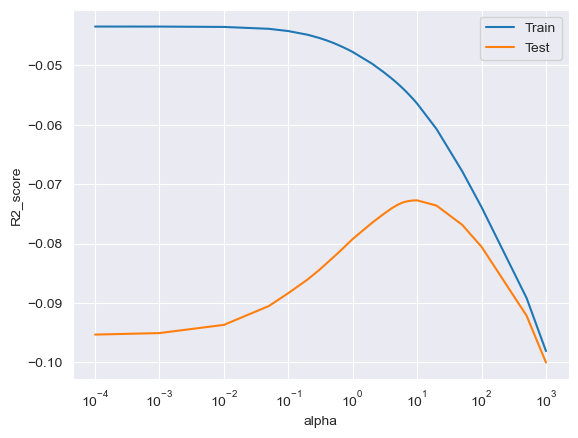

In [470]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Conclusion:
- As the alpha value increases, the train error decreases.
- Graph shows, 10 is the optimum of the alpha. 

#### Lasso Regression model building

In [471]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()

# cross validation
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [472]:
# Display the best optimal alpha value
lassoCV.best_params_

{'alpha': 0.001}

In [473]:
# Create a Lasso regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [474]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [475]:
## View the coefficients of lasso fitted model
lasso.coef_

array([ 0.0034779 ,  0.02126855,  0.05627352,  0.03286243,  0.00155363,
        0.02177139,  0.        , -0.00209326,  0.05413292, -0.        ,
        0.01251515,  0.        ,  0.10528991,  0.00973442,  0.        ,
        0.00495861,  0.00836454, -0.00034609,  0.        , -0.00016501,
        0.01605671,  0.00847032,  0.02450732,  0.01190923,  0.00488319,
        0.00129274,  0.        ,  0.0045912 ,  0.        ,  0.        ,
        0.        , -0.00102757, -0.00203717, -0.        ,  0.        ,
        0.00311211, -0.        ,  0.03441631,  0.        ,  0.        ,
        0.        , -0.02611305,  0.        , -0.02118692, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.03858561,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.01802247, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.02261068,  0.03

In [476]:
# Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [477]:
# Lasso Regression model insights
lasso_insights = show_and_return_insight(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.89
RSS (Train) = 8.65
RSS (Test) = 5.77
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.11


In [478]:
# Display the results of cross validation search
cv_results = pd.DataFrame(lassoCV.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.08,0.00,0.00,0.00,{'alpha': 0.0001},0.92,0.88,0.90,0.92,0.94,0.91,0.02,2,0.97,0.97,0.97,0.97,0.97,0.97,0.00
1,0.02,0.00,0.00,0.00,0.00,{'alpha': 0.001},0.93,0.89,0.90,0.92,0.94,0.92,0.02,1,0.93,0.94,0.94,0.93,0.93,0.93,0.00
2,0.01,0.00,0.00,0.00,0.01,{'alpha': 0.01},0.89,0.83,0.84,0.86,0.88,0.86,0.02,3,0.86,0.87,0.87,0.86,0.86,0.87,0.01
3,0.01,0.01,0.00,0.00,0.05,{'alpha': 0.05},0.82,0.79,0.80,0.79,0.81,0.80,0.01,4,0.80,0.81,0.81,0.81,0.80,0.81,0.01
4,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},0.68,0.67,0.68,0.65,0.68,0.67,0.01,5,0.67,0.68,0.68,0.68,0.67,0.68,0.01


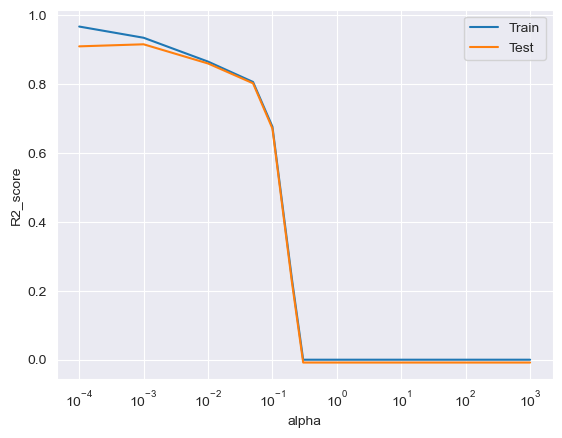

In [479]:
## Plotting R2 score vs alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Conclusion:
- As alpha increase, error decreases in train and test errors
- At approximately value of alpha 0.05, error becomes constant

## Step 6: Compare the two regression models

In [480]:
# Setting float display options
pd.options.display.float_format = "{:,.2f}".format

In [483]:
def comparison_table(r_ins, l_ins):
    table_columns = {
        'Insight': [
            'R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)',
            'RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)',
            'RMSE (Test)'
        ],
        'Ridge Regression' : r_ins,
        'Lasso Regression' : l_ins
    }

    table_df = pd.DataFrame(table_columns, columns = ['Insight', 'Ridge Regression', 'Lasso Regression'] )
    return table_df.set_index('Insight')

In [486]:
comparison_table(ridge_insights, lasso_insights)

,Ridge Regression,Lasso Regression
Insight,,
R2 Score (Train),0.95,0.93
R2 Score (Test),0.90,0.89
RSS (Train),6.32,8.65
RSS (Test),5.56,5.77
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.08,0.09
RMSE (Test),0.11,0.11


R2 score on test dataset is close to 90 for both Ridge and Lasso regression model.

In [487]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas.head(10)

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [488]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [489]:
betas.head(10)

,Ridge,Lasso
LotFrontage,0.01,0.00
LotArea,0.02,0.02
YearBuilt,0.05,0.06
YearRemodAdd,0.03,0.03
MasVnrArea,-0.00,0.00
BsmtFinSF1,0.01,0.02
BsmtFinSF2,-0.00,0.00
BsmtUnfSF,-0.01,-0.00
TotalBsmtSF,0.06,0.05
1stFlrSF,0.00,-0.00


In [490]:
## View the features removed by Lasso
betas[betas['Lasso']==0].shape

(305, 2)

Lasso has removed 305 of 384 features from the training data set.

## Step 7: Inferences

In [491]:
## View the top 5 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea              0.09
OverallQual_9          0.09
Neighborhood_Crawfor   0.08
OverallQual_8          0.08
OverallCond_9          0.08
TotalBsmtSF            0.06
Functional_Typ         0.06
Exterior1st_BrkFace    0.05
YearBuilt              0.05
Neighborhood_Somerst   0.05
Name: Ridge, dtype: float64

In [492]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.09
OverallQual_9          1.09
Neighborhood_Crawfor   1.08
OverallQual_8          1.08
OverallCond_9          1.08
TotalBsmtSF            1.06
Functional_Typ         1.06
Exterior1st_BrkFace    1.05
YearBuilt              1.05
Neighborhood_Somerst   1.05
Name: Ridge, dtype: float64

In [493]:
## View the top 5 coefficients of Lasso regression in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.15
OverallQual_8          0.12
GrLivArea              0.11
Neighborhood_Crawfor   0.10
Functional_Typ         0.06
OverallQual_7          0.06
Neighborhood_Somerst   0.06
YearBuilt              0.06
TotalBsmtSF            0.05
Exterior1st_BrkFace    0.05
Name: Lasso, dtype: float64

In [494]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]


OverallQual_9          1.16
OverallQual_8          1.13
GrLivArea              1.11
Neighborhood_Crawfor   1.10
Functional_Typ         1.06
OverallQual_7          1.06
Neighborhood_Somerst   1.06
YearBuilt              1.06
TotalBsmtSF            1.06
Exterior1st_BrkFace    1.05
Name: Lasso, dtype: float64

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer
- Optimal value of lambda for Ridge Regression = 10
- Optimal value of lambda for Lasso = 0.001

In [495]:
## Build the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [496]:
## Make a prediction
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [497]:
ridge_insights = show_and_return_insight(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.90
RSS (Train) = 7.16
RSS (Test) = 5.54
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.08
RMSE (Test) = 0.11


In [498]:
## Build the lasso regression model with double value of alpha i.e. 20
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [499]:
# Make a prediction
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [500]:
lasso_insights = show_and_return_insight(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 10.63
RSS (Test) = 6.65
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.10
RMSE (Test) = 0.12


In [501]:
comparison_table(ridge_insights, lasso_insights)

,Ridge Regression,Lasso Regression
Insight,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.90,0.88
RSS (Train),7.16,10.63
RSS (Test),5.54,6.65
MSE (Train),0.01,0.01
MSE (Test),0.01,0.02
RMSE (Train),0.08,0.10
RMSE (Test),0.11,0.12


### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [502]:
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Exterior1st_BrkFace']

In [503]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [504]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [505]:
lassoCV.best_params_

{'alpha': 0.0001}

In [506]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [508]:
# Make a prediction
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [509]:
lasso_insights = show_and_return_insight(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.89
RSS (Train) = 9.93
RSS (Test) = 6.09
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.12


In [510]:
comparison_table(ridge_insights, lasso_insights)

,Ridge Regression,Lasso Regression
Insight,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.90,0.89
RSS (Train),7.16,9.93
RSS (Test),5.54,6.09
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.08,0.10
RMSE (Test),0.11,0.12


In [511]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas.head(5)

""
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea


In [512]:
betas['Lasso'] = lasso.coef_

In [513]:
betas.head(5)

,Lasso
LotFrontage,0.00
LotArea,0.02
YearBuilt,0.05
YearRemodAdd,0.03
MasVnrArea,0.00


In [514]:
betas['Lasso'].sort_values(ascending=False)[:5]


2ndFlrSF               0.10
1stFlrSF               0.07
TotalBsmtSF            0.07
MSSubClass_70          0.06
Neighborhood_Somerst   0.06
Name: Lasso, dtype: float64